In [1]:
import pandas as pd

from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb 

In [2]:
train_df = pd.read_parquet('train.parquet')
test_df = pd.read_parquet('test.parquet')

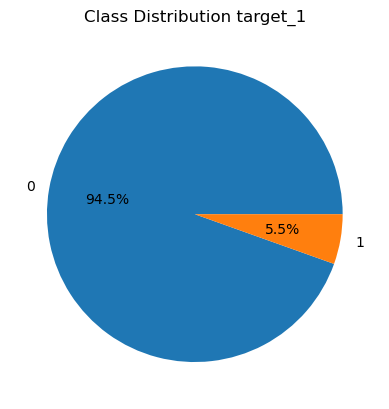

In [3]:
temp =train_df['target_1'].value_counts() 
plt.pie(temp.values, labels=temp.index.values, autopct='%1.1f%%') 
plt.title("Class Distribution target_1") 
plt.show()

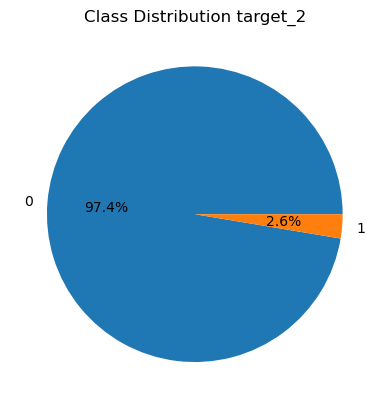

In [4]:
temp = train_df['target_2'].value_counts() 
plt.pie(temp.values, labels=temp.index.values, autopct='%1.1f%%') 
plt.title("Class Distribution target_2") 
plt.show()

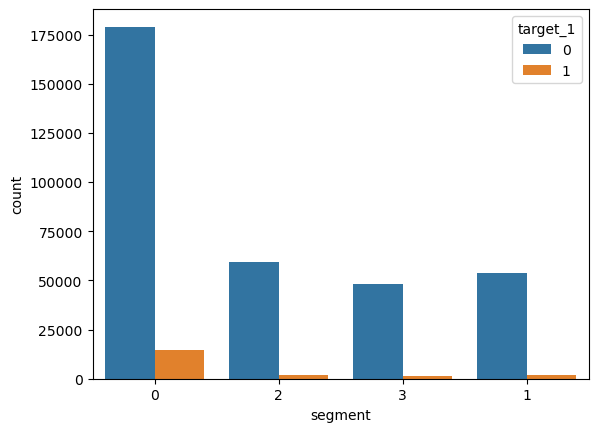

In [5]:
sb.countplot(data=train_df, x='segment', hue='target_1') 
plt.show() 

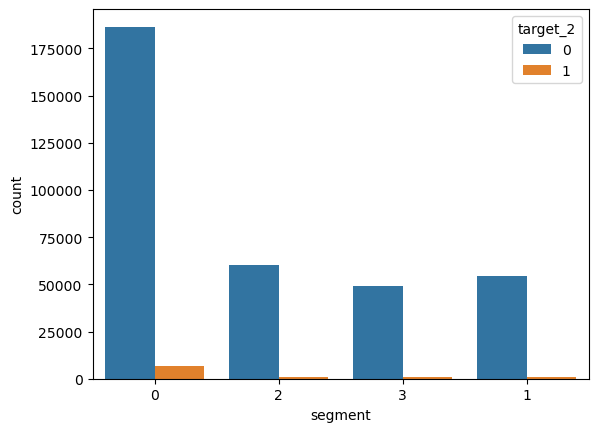

In [6]:
sb.countplot(data=train_df, x='segment', hue='target_2') 
plt.show() 

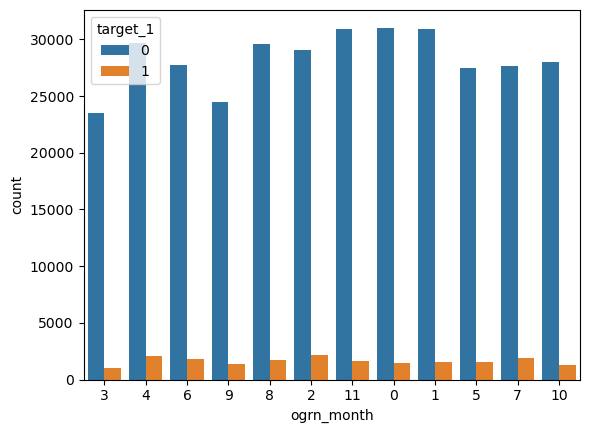

In [7]:
sb.countplot(data=train_df, x='ogrn_month', hue='target_1') 
plt.show() 

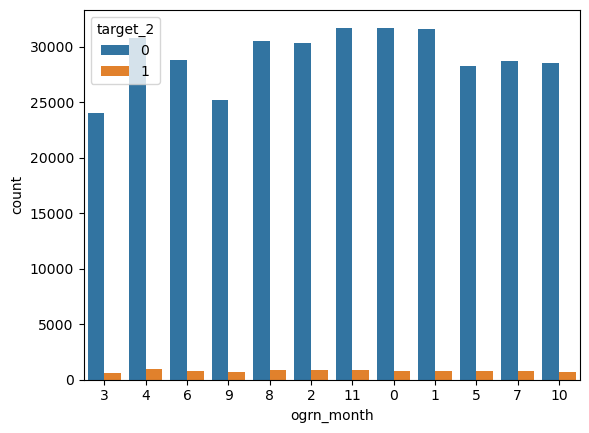

In [8]:
sb.countplot(data=train_df, x='ogrn_month', hue='target_2') 
plt.show() 

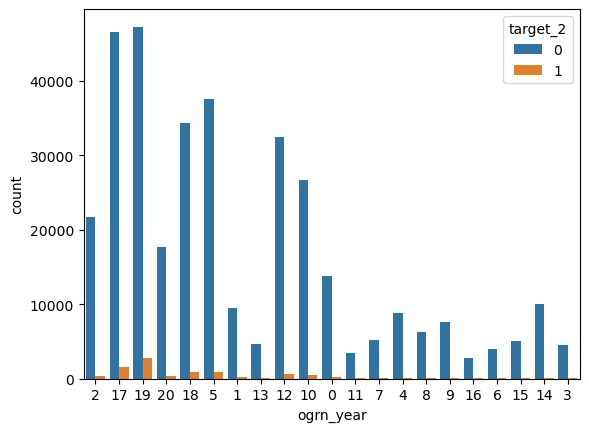

In [9]:
sb.countplot(data=train_df, x='ogrn_year', hue='target_2') 
plt.show() 

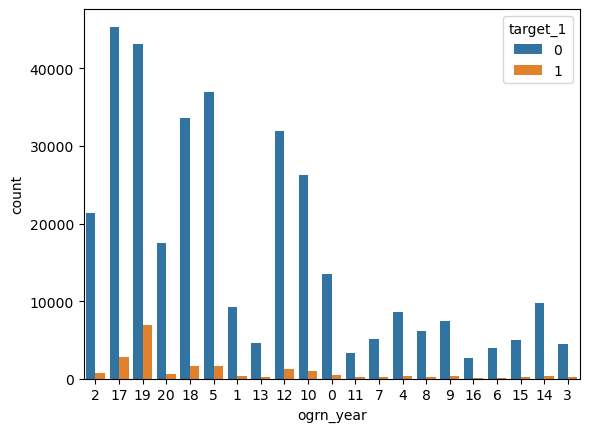

In [10]:
sb.countplot(data=train_df, x='ogrn_year', hue='target_1') 
plt.show() 

In [11]:
train_df_target_1_1 = train_df[train_df['target_1'] == 1]
train_df_target_1_0 = train_df[train_df['target_1'] == 0]
train_df_target_2_1 = train_df[train_df['target_2'] == 1]
train_df_target_2_0 = train_df[train_df['target_2'] == 0]

In [12]:
test_df_target_1_1 = test_df[train_df['target_1'] == 1]
test_df_target_1_0 = test_df[train_df['target_1'] == 0]
test_df_target_2_1 = test_df[train_df['target_2'] == 1]
test_df_target_2_0 = test_df[train_df['target_2'] == 0]

C:\Users\Юлия\AppData\Local\Temp\ipykernel_9252\3167904160.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_df_target_1_1 = test_df[train_df['target_1'] == 1]
C:\Users\Юлия\AppData\Local\Temp\ipykernel_9252\3167904160.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_df_target_1_0 = test_df[train_df['target_1'] == 0]
C:\Users\Юлия\AppData\Local\Temp\ipykernel_9252\3167904160.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_df_target_2_1 = test_df[train_df['target_2'] == 1]
C:\Users\Юлия\AppData\Local\Temp\ipykernel_9252\3167904160.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_df_target_2_0 = test_df[train_df['target_2'] == 0]


In [13]:
important_features_target1 = train_df[['balance_amt_min', 'rko_start_months', 'sum_cred_e_oper_1m', 'sum_deb_e_oper_1m', 'cnt_b_oper_1m', 'sum_cred_d_oper_3m', 'cnt_deb_d_oper_3m','sum_c_oper_1m']]
#important_features_target2 = 


In [14]:
important_features_target1_test = test_df[['balance_amt_min', 'rko_start_months', 'sum_cred_e_oper_1m', 'sum_deb_e_oper_1m', 'cnt_b_oper_1m', 'sum_cred_d_oper_3m', 'cnt_deb_d_oper_3m','sum_c_oper_1m']]

In [15]:
train_rko = train_df[train_df['rko_start_months']>= 0]

C:\Users\Юлия\AppData\Local\Temp\ipykernel_9252\1806240961.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(train_rko['rko_start_months']).set_figwidth(4)


AttributeError: 'Axes' object has no attribute 'set_figwidth'

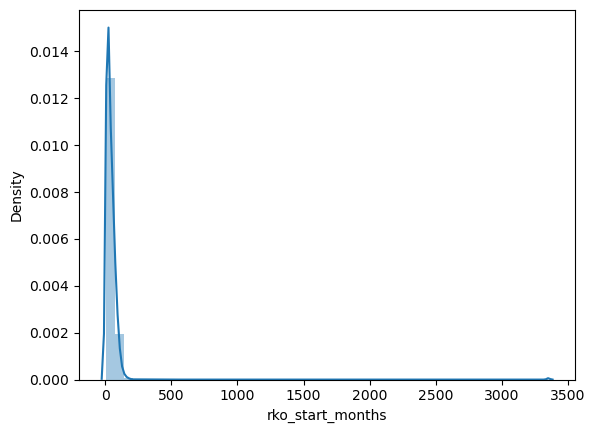

In [17]:
sb.distplot(train_rko['rko_start_months']).set_figwidth(4)
#f.set_figwidth(4) 
#f.set_figheight(1) 

C:\Users\Юлия\AppData\Local\Temp\ipykernel_4820\3320129752.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 2, i+1)
C:\Users\Юлия\AppData\Local\Temp\ipykernel_4820\3320129752.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(train_df_target_1_1[col])
C:\Users\Юлия\AppData\Local\Temp\ipykernel_4820\3320129752.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibil

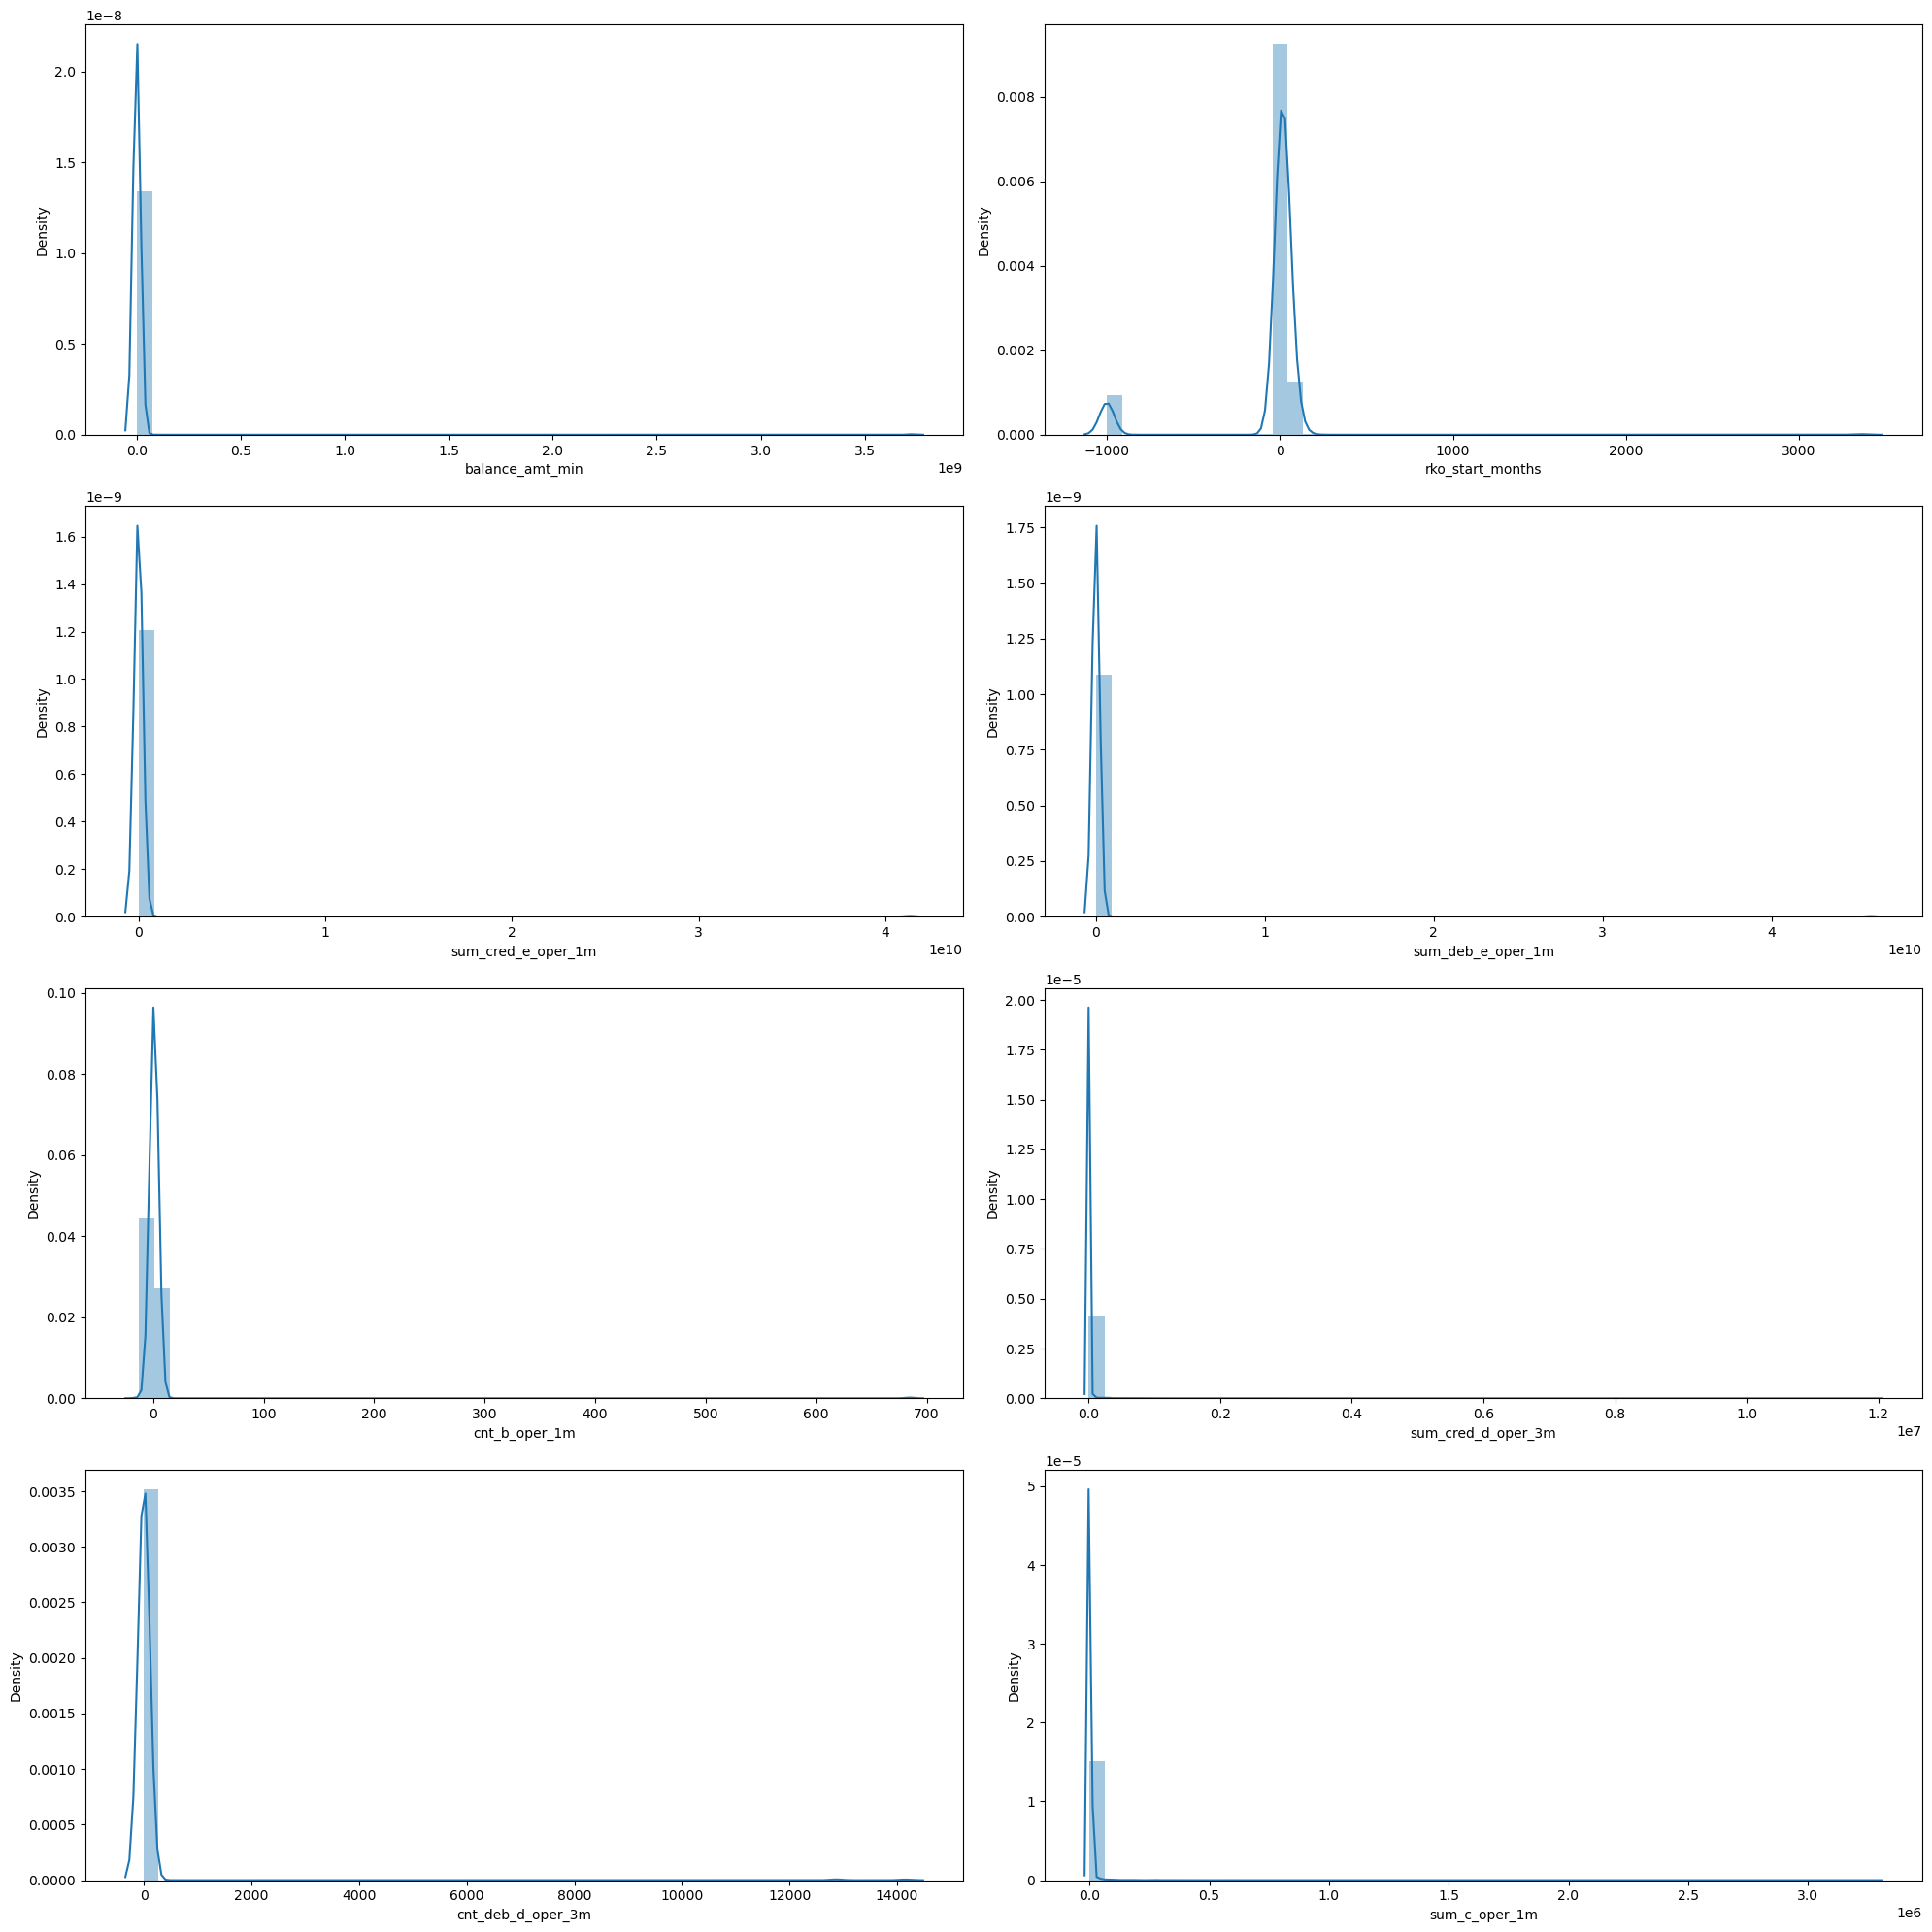

In [11]:
plt.subplots(figsize=(20, 20)) 
for i, col in enumerate(important_features_target1): 
    plt.subplot(4, 2, i+1) 
    sb.distplot(train_df_target_1_1[col]) 
plt.tight_layout() 
plt.show() 

C:\Users\Юлия\AppData\Local\Temp\ipykernel_4820\4081486357.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 2, i+1)
C:\Users\Юлия\AppData\Local\Temp\ipykernel_4820\4081486357.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(test_df[col])
C:\Users\Юлия\AppData\Local\Temp\ipykernel_4820\4081486357.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `his

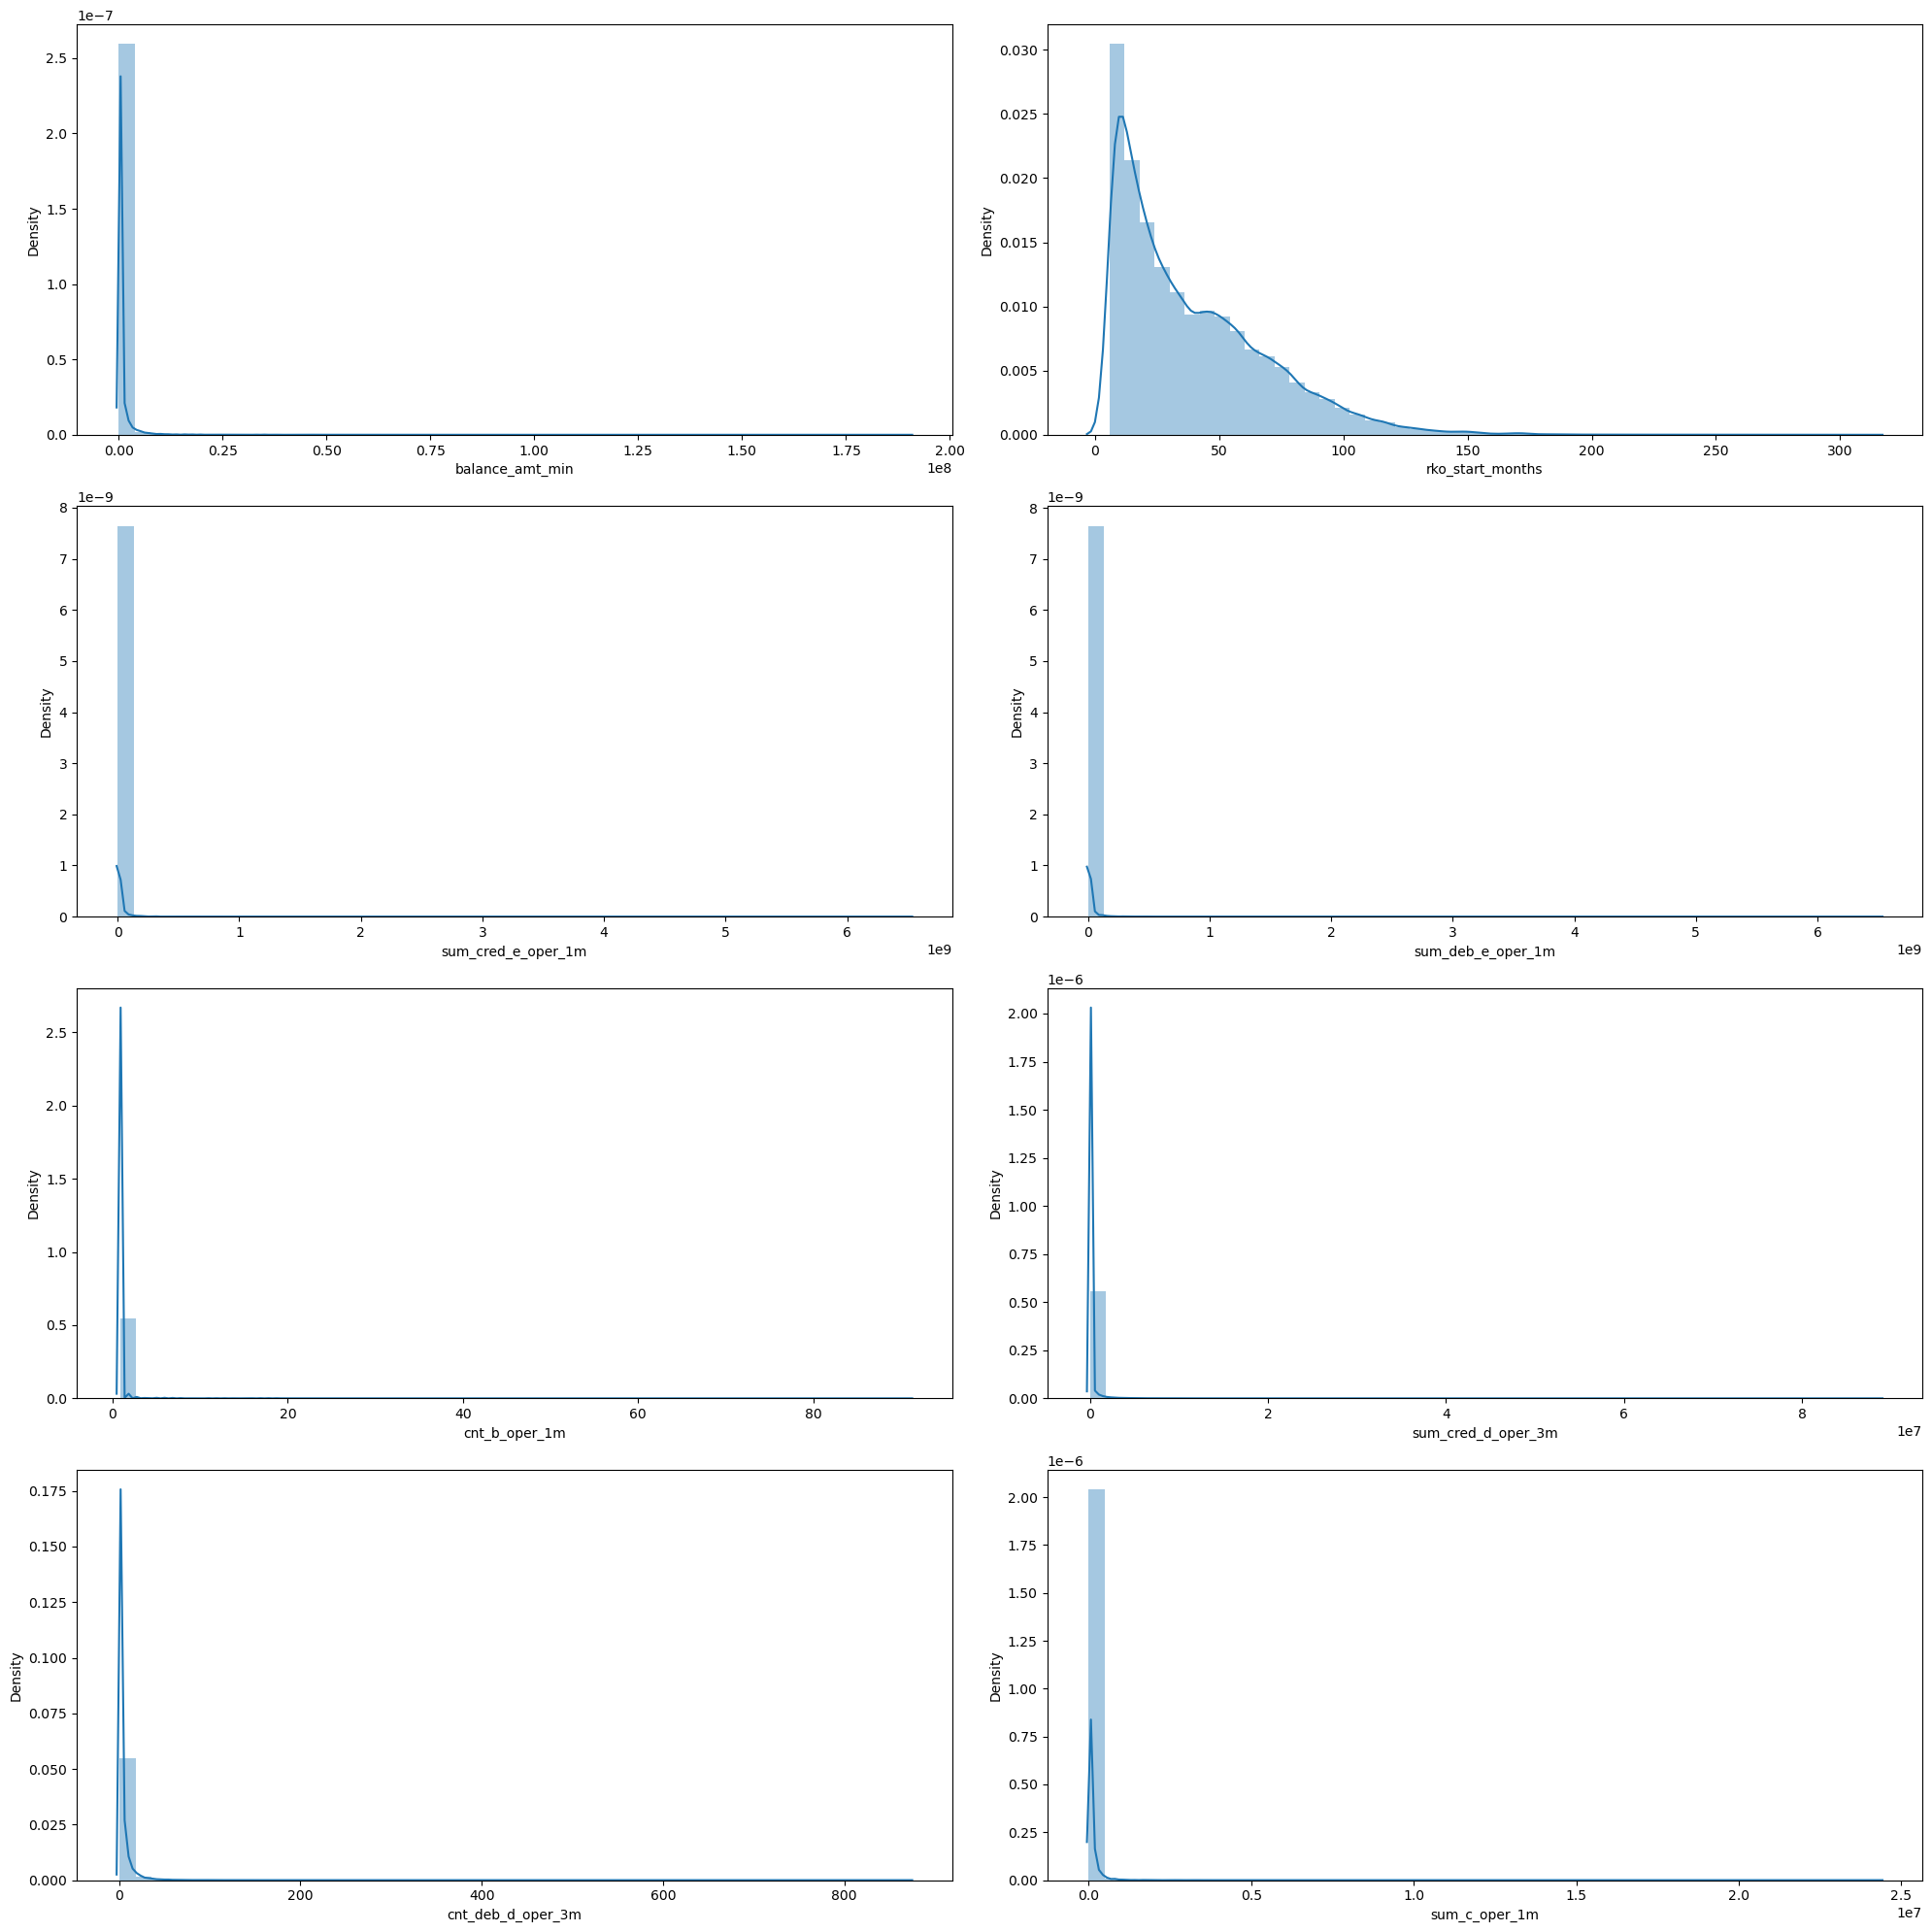

In [38]:
plt.subplots(figsize=(20, 20)) 
for i, col in enumerate(important_features_target1_test): 
    plt.subplot(4, 2, i+1) 
    sb.distplot(test_df[col]) 
plt.tight_layout() 
plt.show() 

C:\Users\Юлия\AppData\Local\Temp\ipykernel_4820\1734678796.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 2, i+1)
C:\Users\Юлия\AppData\Local\Temp\ipykernel_4820\1734678796.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(train_df_target_1_0[col])
C:\Users\Юлия\AppData\Local\Temp\ipykernel_4820\1734678796.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibil

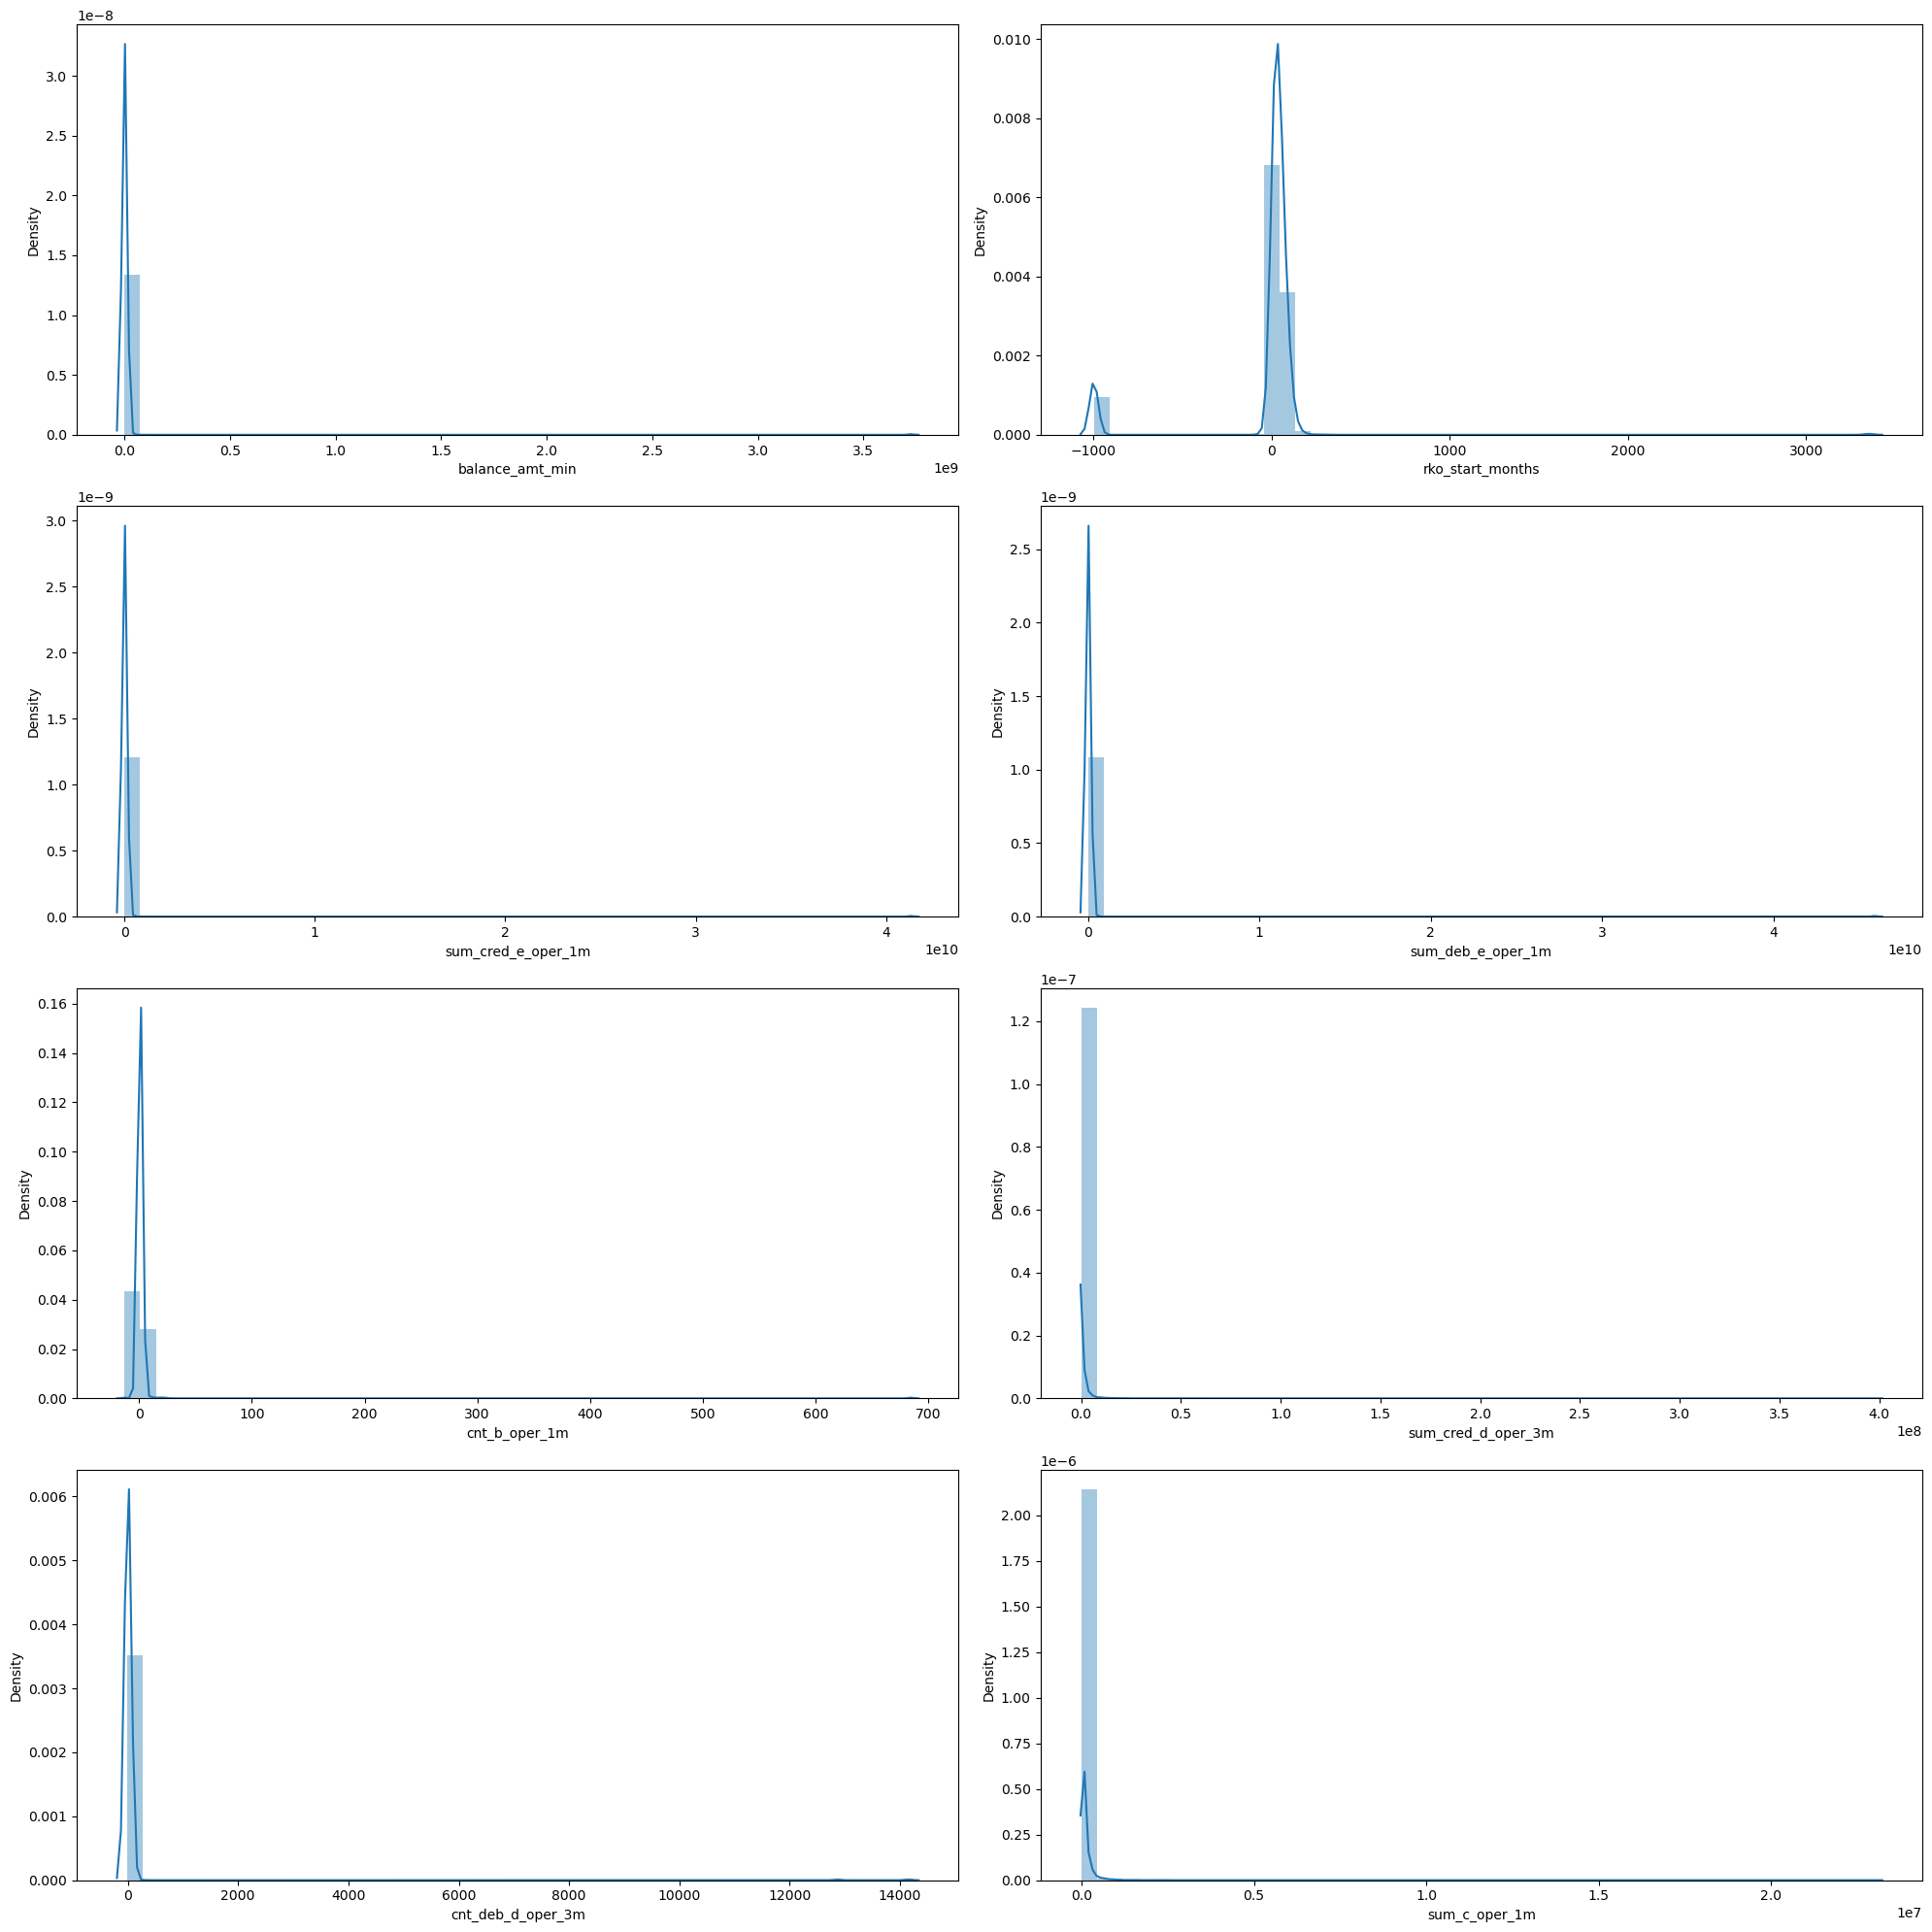

In [12]:
plt.subplots(figsize=(20, 20)) 
for i, col in enumerate(important_features_target1): 
    plt.subplot(4, 2, i+1) 
    sb.distplot(train_df_target_1_0[col]) 
plt.tight_layout() 
plt.show() 

<Axes: xlabel='log_balance_amt_min', ylabel='Count'>

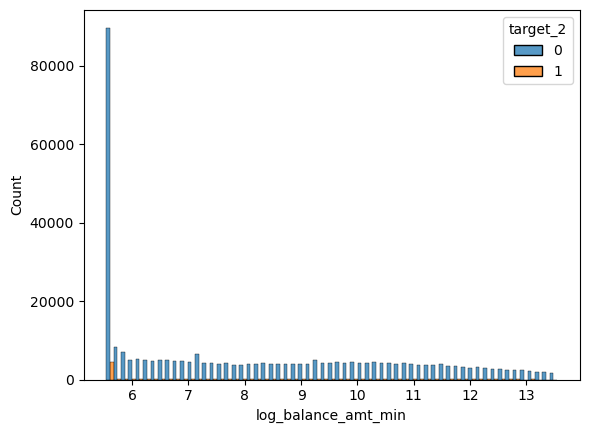

In [13]:
ft = 'balance_amt_min'

temp = train_df[[ft, 'target_1', 'target_2']].dropna()
temp = temp[(temp[ft] > 0) & (temp[ft] < temp[ft].quantile(.95))]
temp['log_'+ft] = np.log(temp[ft])
sb.histplot(data=temp, x='log_'+ft, hue='target_2', multiple='dodge')
#sns.histplot(data=temp, x=ft, hue='target_1', multiple='dodge')

<Axes: xlabel='log_balance_amt_min', ylabel='Count'>

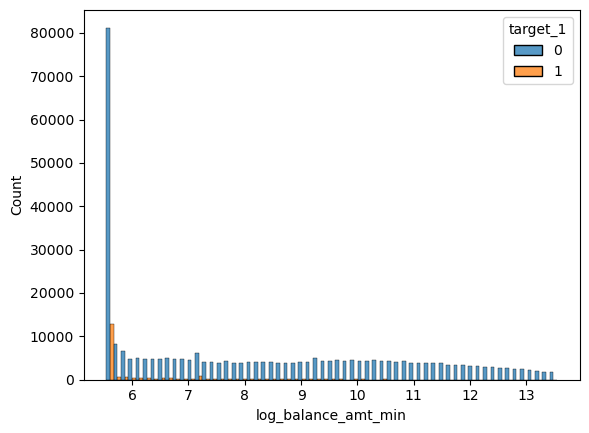

In [14]:
ft = 'balance_amt_min'

temp = train_df[[ft, 'target_1', 'target_2']].dropna()
temp = temp[(temp[ft] > 0) & (temp[ft] < temp[ft].quantile(.95))]
temp['log_'+ft] = np.log(temp[ft])
sb.histplot(data=temp, x='log_'+ft, hue='target_1', multiple='dodge')
#sns.histplot(data=temp, x=ft, hue='target_1', multiple='dodge')

<Axes: xlabel='okved'>

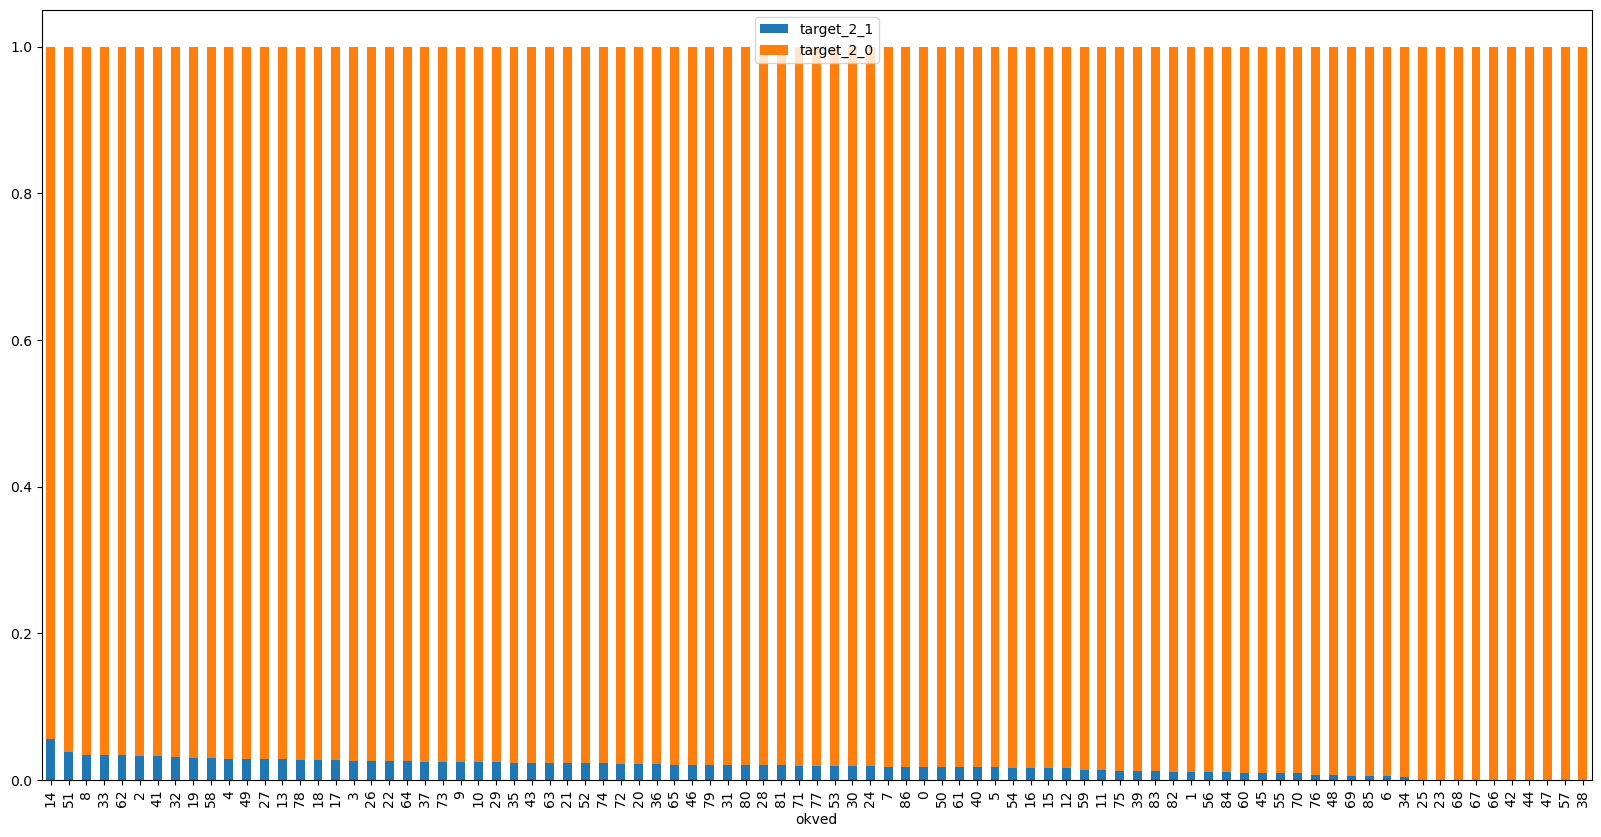

In [16]:
ft = 'okved'
temp1 = train_df[[ft, 'target_1', 'target_2']].dropna().groupby([ft])[['target_2']].mean()
temp1['target_2_1'] = temp1['target_2']
temp1['target_2_0'] = 1 - temp1['target_2']

temp1.groupby([ft])[['target_2_1', 'target_2_0']].mean().sort_values('target_2_0').plot.bar(figsize=(20, 10), stacked = True)

<Axes: xlabel='okved'>

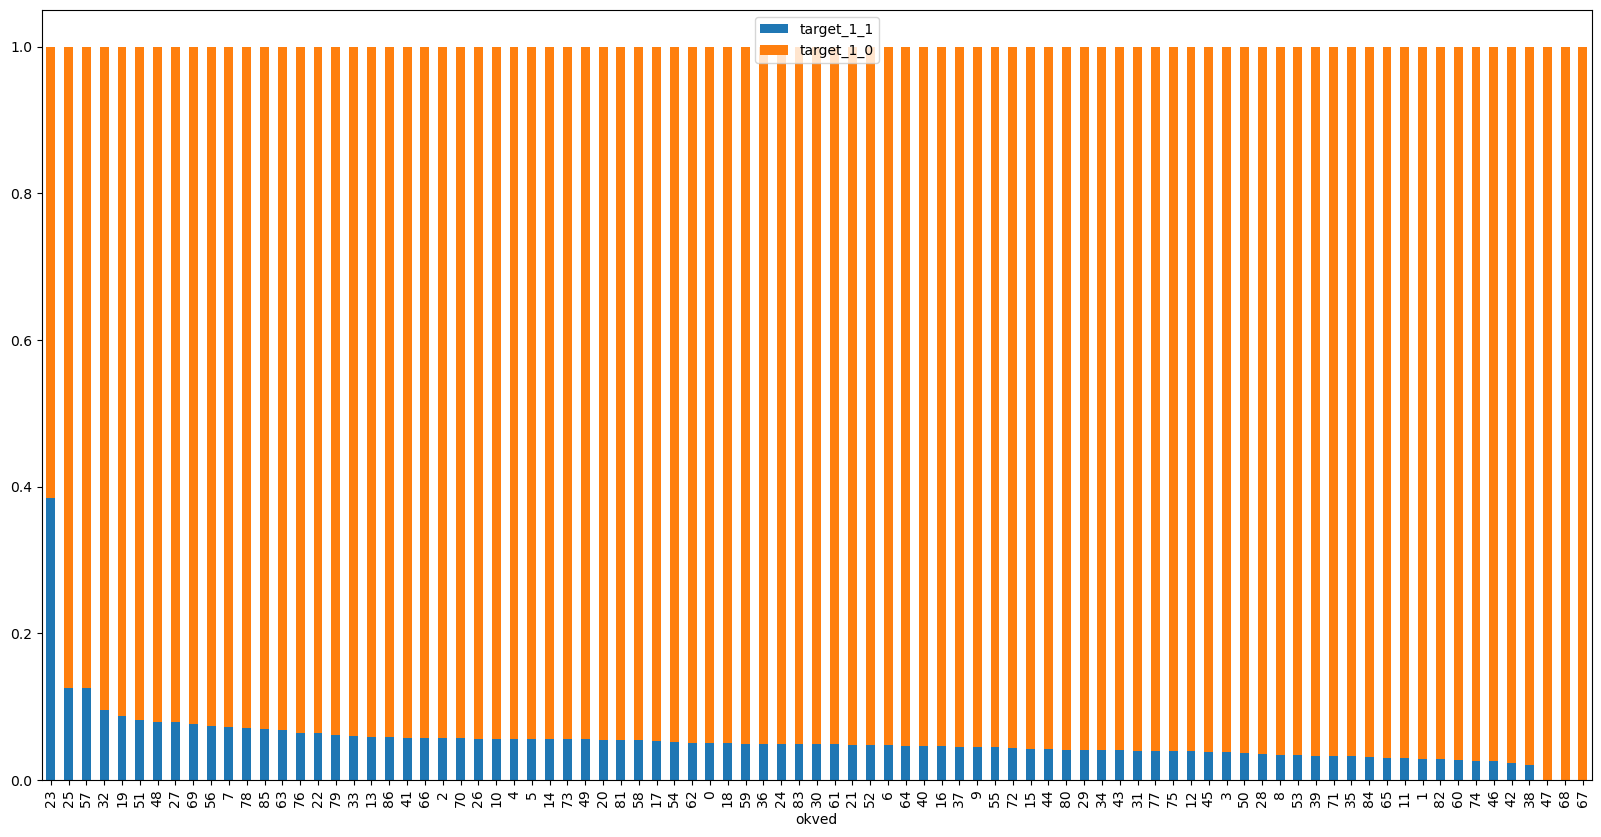

In [19]:
ft = 'okved'
temp1 = train_df[[ft, 'target_1', 'target_2']].dropna().groupby([ft])[['target_1']].mean()
temp1['target_1_1'] = temp1['target_1']
temp1['target_1_0'] = 1 - temp1['target_1']

temp1.groupby([ft])[['target_1_1', 'target_1_0']].mean().sort_values('target_1_0').plot.bar(figsize=(20, 10), stacked = True)

<Axes: xlabel='segment'>

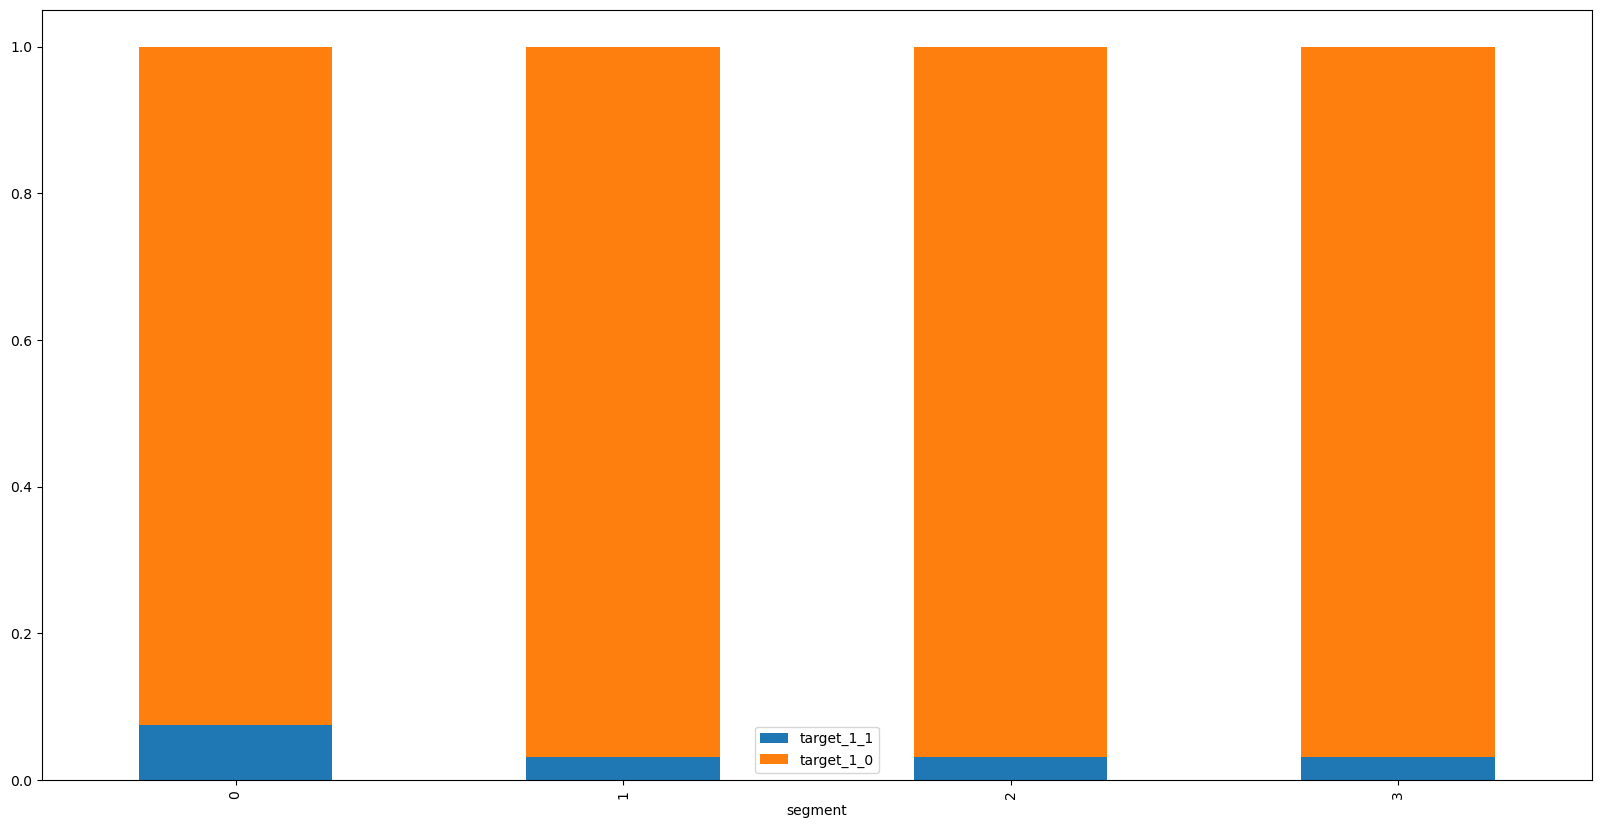

In [20]:
ft = 'segment'
temp1 = train_df[[ft, 'target_1', 'target_2']].dropna().groupby([ft])[['target_1']].mean()
temp1['target_1_1'] = temp1['target_1']
temp1['target_1_0'] = 1 - temp1['target_1']

temp1.groupby([ft])[['target_1_1', 'target_1_0']].mean().sort_values('target_1_0').plot.bar(figsize=(20, 10), stacked = True)

<Axes: xlabel='segment'>

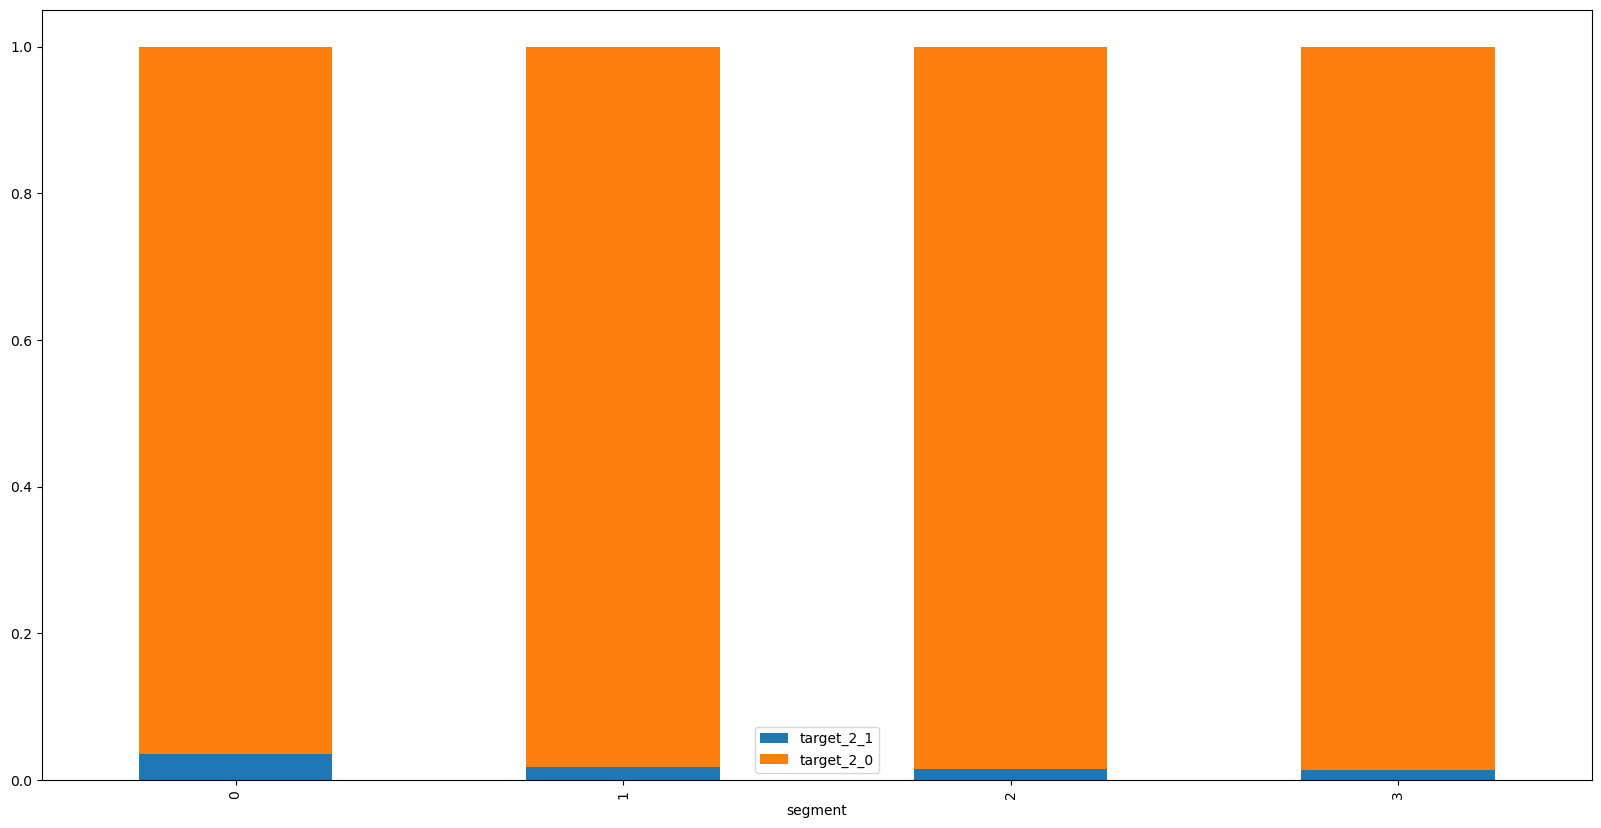

In [21]:
ft = 'segment'
temp1 = train_df[[ft, 'target_1', 'target_2']].dropna().groupby([ft])[['target_2']].mean()
temp1['target_2_1'] = temp1['target_2']
temp1['target_2_0'] = 1 - temp1['target_2']

temp1.groupby([ft])[['target_2_1', 'target_2_0']].mean().sort_values('target_2_0').plot.bar(figsize=(20, 10), stacked = True)

<Axes: xlabel='channel_code'>

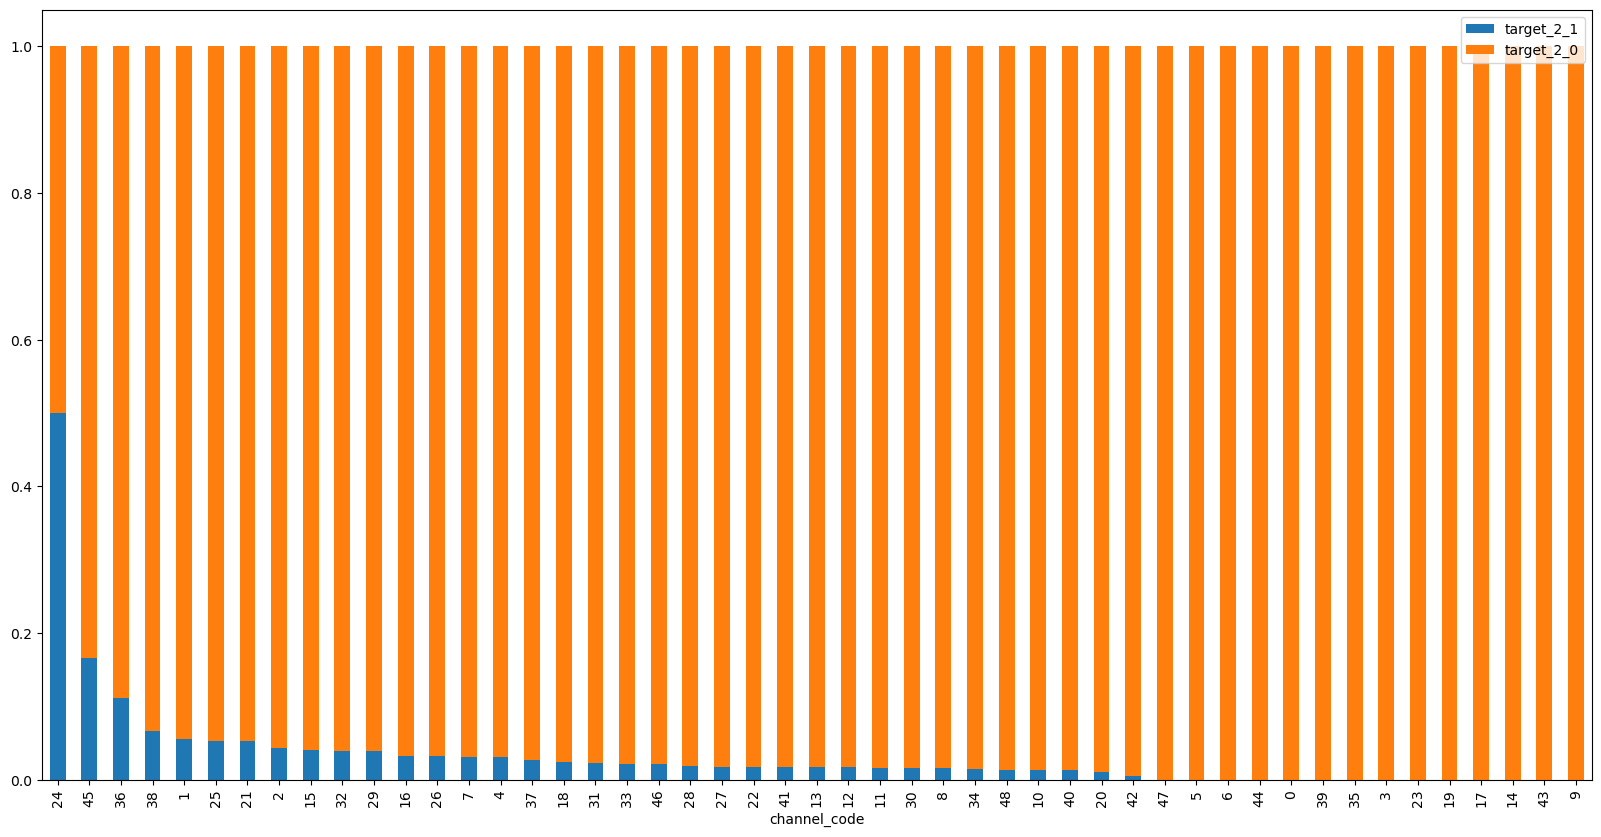

In [17]:
ft = 'channel_code'
temp1 = train_df[[ft, 'target_1', 'target_2']].dropna().groupby([ft])[['target_2']].mean()
temp1['target_2_1'] = temp1['target_2']
temp1['target_2_0'] = 1 - temp1['target_2']

temp1.groupby([ft])[['target_2_1', 'target_2_0']].mean().sort_values('target_2_0').plot.bar(figsize=(20, 10), stacked = True)

<Axes: xlabel='channel_code'>

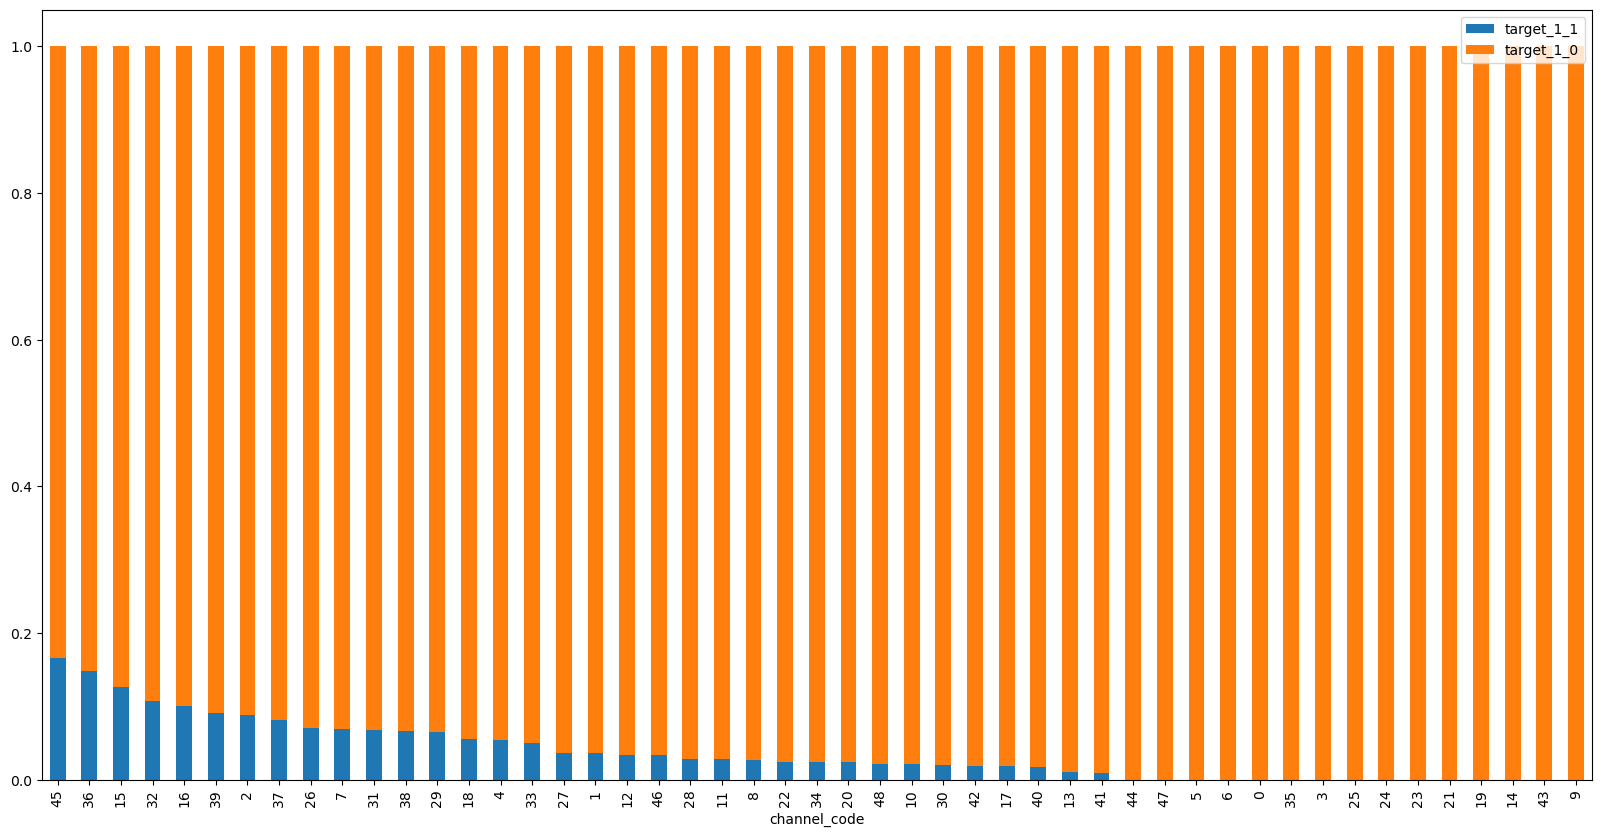

In [18]:
ft = 'channel_code'
temp1 = train_df[[ft, 'target_1', 'target_2']].dropna().groupby([ft])[['target_1']].mean()
temp1['target_1_1'] = temp1['target_1']
temp1['target_1_0'] = 1 - temp1['target_1']

temp1.groupby([ft])[['target_1_1', 'target_1_0']].mean().sort_values('target_1_0').plot.bar(figsize=(20, 10), stacked = True)

<Axes: xlabel='rko_start_months', ylabel='Count'>

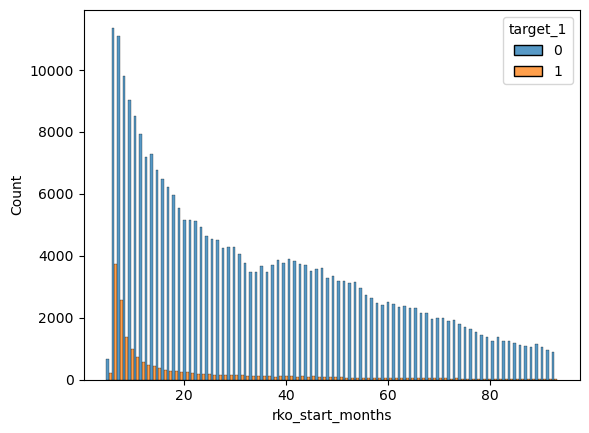

In [31]:
ft = 'rko_start_months'

temp = train_df[[ft, 'target_1', 'target_2']].dropna()
temp = temp[(temp[ft] > 0) & (temp[ft] < temp[ft].quantile(.95))]
temp['log_'+ft] = temp[ft]
sb.histplot(data=temp, x=ft, hue='target_1', multiple='dodge')
#sns.histplot(data=temp, x=ft, hue='target_1', multiple='dodge')

<Axes: xlabel='rko_start_months', ylabel='Count'>

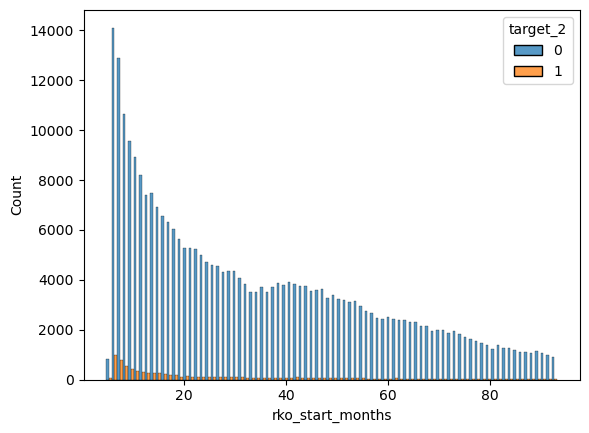

In [32]:
ft = 'rko_start_months'

temp = train_df[[ft, 'target_1', 'target_2']].dropna()
temp = temp[(temp[ft] > 0) & (temp[ft] < temp[ft].quantile(.95))]
temp['log_'+ft] = temp[ft]
sb.histplot(data=temp, x=ft, hue='target_2', multiple='dodge')
#sns.histplot(data=temp, x=ft, hue='target_1', multiple='dodge')

<Axes: xlabel='log_rko_start_months', ylabel='Count'>

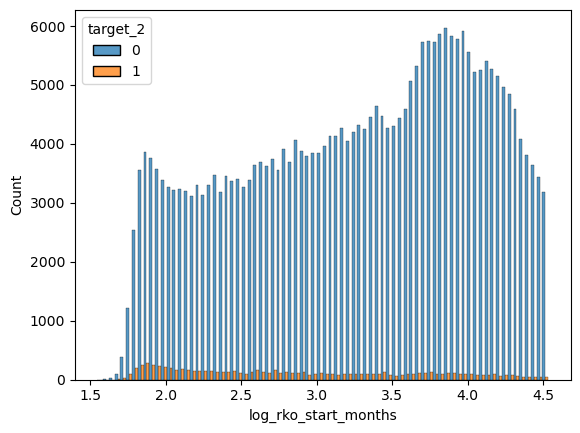

In [33]:
ft = 'rko_start_months'

temp = train_df[[ft, 'target_1', 'target_2']].dropna()
temp = temp[(temp[ft] > 0) & (temp[ft] < temp[ft].quantile(.95))]
temp['log_'+ft] = np.log(temp[ft])
sb.histplot(data=temp, x='log_'+ft, hue='target_2', multiple='dodge')
#sns.histplot(data=temp, x=ft, hue='target_1', multiple='dodge')

<Axes: xlabel='log_rko_start_months', ylabel='Count'>

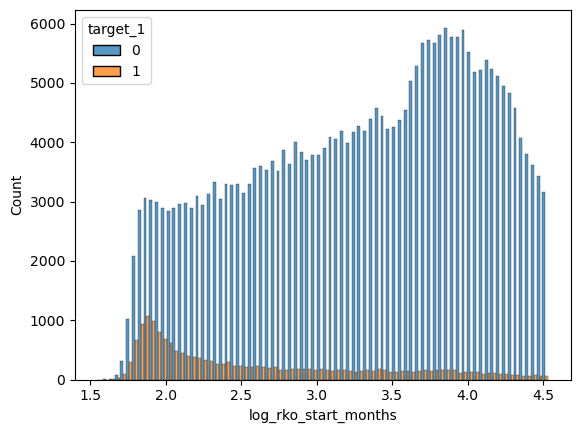

In [34]:
ft = 'rko_start_months'

temp = train_df[[ft, 'target_1', 'target_2']].dropna()
temp = temp[(temp[ft] > 0) & (temp[ft] < temp[ft].quantile(.95))]
temp['log_'+ft] = np.log(temp[ft])
sb.histplot(data=temp, x='log_'+ft, hue='target_1', multiple='dodge')
#sns.histplot(data=temp, x=ft, hue='target_1', multiple='dodge')

In [20]:
from scipy import stats

In [27]:
differences = []
for column in train_df.drop(['target_1','id','total_target', 'city', 'city_type',
    'index_city_code', 'ogrn_month', 'ogrn_year',
    'branch_code', 'okved', 'segment', 'target_2'], axis=1).columns:
    if train_df[column].dtype in ['int64', 'float64'] and test_df[column].dtype in ['int64', 'float64']:
        if not train_df[column].isnull().any() and not test_df[column].isnull().any():
            if (abs(train_df[column].mean() - test_df[column].mean()) > 1.5 * train_df[column].std()) or (abs(train_df[column].std() - test_df[column].std()) > 1.5):
                differences.append(column)

In [28]:
differences

['sum_a_oper_1m',
 'sum_b_oper_1m',
 'sum_c_oper_1m',
 'sum_deb_d_oper_1m',
 'sum_cred_d_oper_1m',
 'sum_deb_e_oper_1m',
 'sum_cred_e_oper_1m',
 'sum_deb_f_oper_1m',
 'sum_cred_f_oper_1m',
 'sum_deb_g_oper_1m',
 'sum_cred_g_oper_1m',
 'sum_deb_h_oper_1m',
 'sum_cred_h_oper_1m',
 'sum_a_oper_3m',
 'sum_b_oper_3m',
 'sum_c_oper_3m',
 'sum_deb_d_oper_3m',
 'sum_cred_d_oper_3m',
 'sum_deb_e_oper_3m',
 'sum_cred_e_oper_3m',
 'sum_deb_f_oper_3m',
 'sum_cred_f_oper_3m',
 'sum_deb_g_oper_3m',
 'sum_cred_g_oper_3m',
 'sum_deb_h_oper_3m',
 'sum_cred_h_oper_3m']

C:\Users\Юлия\AppData\Local\Temp\ipykernel_9252\3920947444.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(train_df[col], label='train_df', shade=True)
C:\Users\Юлия\AppData\Local\Temp\ipykernel_9252\3920947444.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(test_df[col], label='test_df', shade=True)


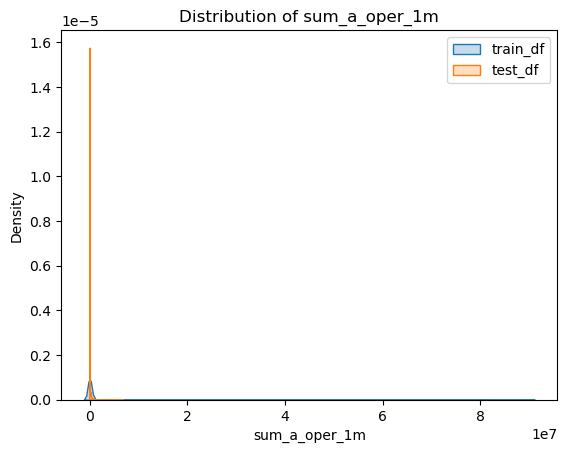

C:\Users\Юлия\AppData\Local\Temp\ipykernel_9252\3920947444.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(train_df[col], label='train_df', shade=True)
C:\Users\Юлия\AppData\Local\Temp\ipykernel_9252\3920947444.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(test_df[col], label='test_df', shade=True)


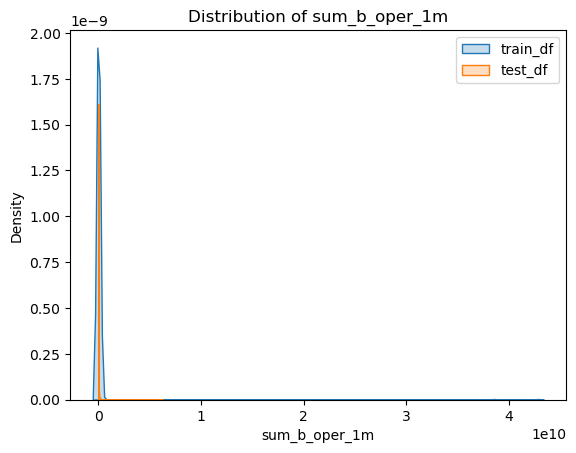

C:\Users\Юлия\AppData\Local\Temp\ipykernel_9252\3920947444.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(train_df[col], label='train_df', shade=True)
C:\Users\Юлия\AppData\Local\Temp\ipykernel_9252\3920947444.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(test_df[col], label='test_df', shade=True)


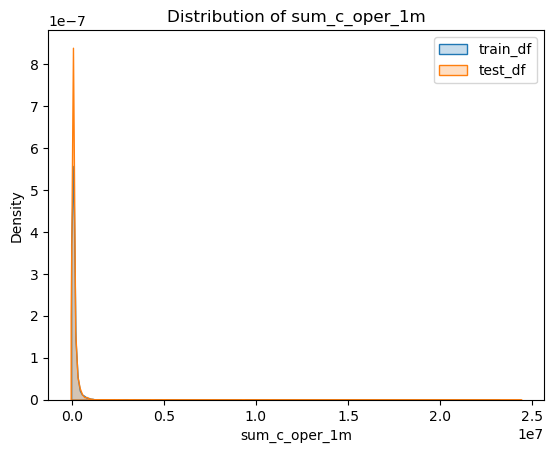

C:\Users\Юлия\AppData\Local\Temp\ipykernel_9252\3920947444.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(train_df[col], label='train_df', shade=True)
C:\Users\Юлия\AppData\Local\Temp\ipykernel_9252\3920947444.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(test_df[col], label='test_df', shade=True)


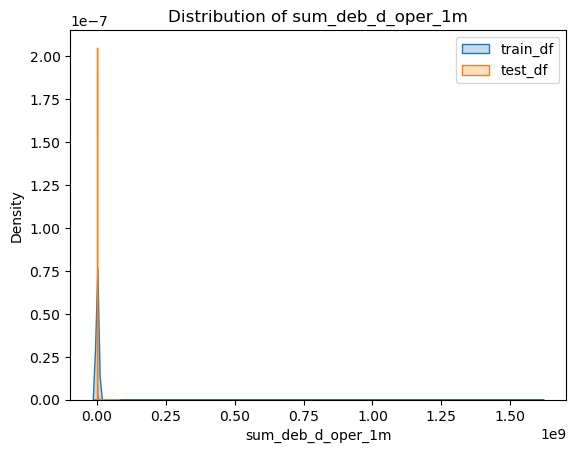

C:\Users\Юлия\AppData\Local\Temp\ipykernel_9252\3920947444.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(train_df[col], label='train_df', shade=True)
C:\Users\Юлия\AppData\Local\Temp\ipykernel_9252\3920947444.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(test_df[col], label='test_df', shade=True)


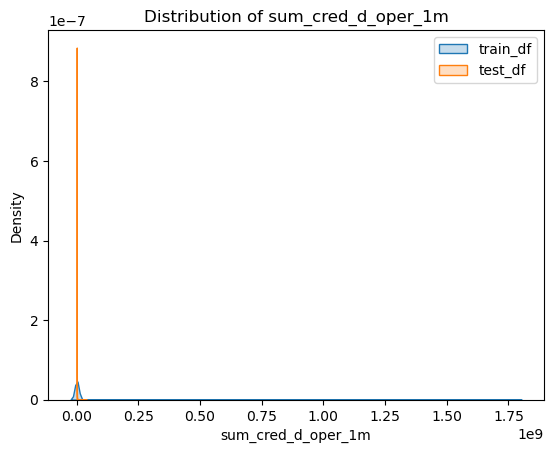

C:\Users\Юлия\AppData\Local\Temp\ipykernel_9252\3920947444.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(train_df[col], label='train_df', shade=True)
C:\Users\Юлия\AppData\Local\Temp\ipykernel_9252\3920947444.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(test_df[col], label='test_df', shade=True)


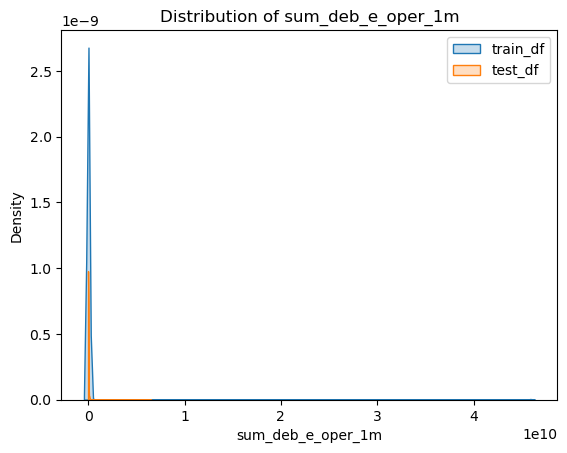

C:\Users\Юлия\AppData\Local\Temp\ipykernel_9252\3920947444.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(train_df[col], label='train_df', shade=True)
C:\Users\Юлия\AppData\Local\Temp\ipykernel_9252\3920947444.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(test_df[col], label='test_df', shade=True)


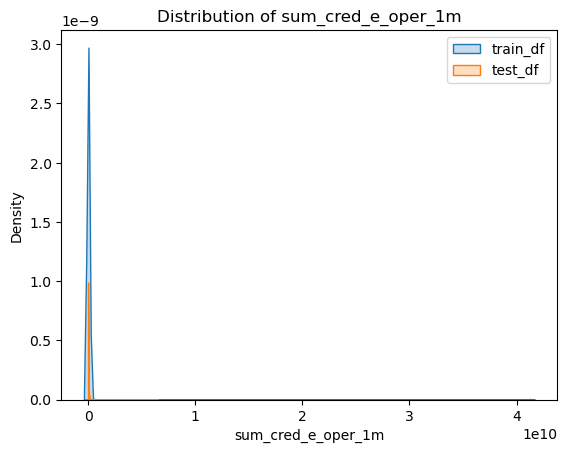

C:\Users\Юлия\AppData\Local\Temp\ipykernel_9252\3920947444.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(train_df[col], label='train_df', shade=True)
C:\Users\Юлия\AppData\Local\Temp\ipykernel_9252\3920947444.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(test_df[col], label='test_df', shade=True)


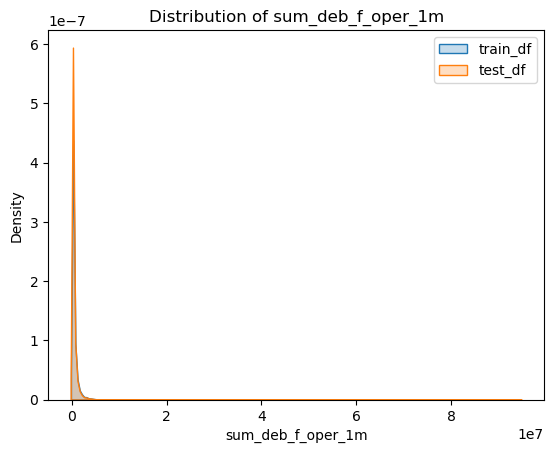

C:\Users\Юлия\AppData\Local\Temp\ipykernel_9252\3920947444.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(train_df[col], label='train_df', shade=True)
C:\Users\Юлия\AppData\Local\Temp\ipykernel_9252\3920947444.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(test_df[col], label='test_df', shade=True)


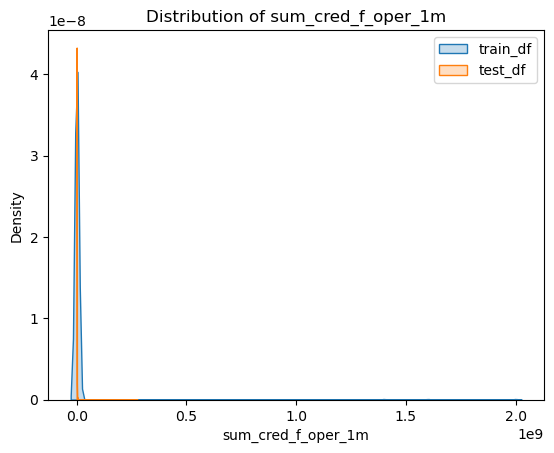

C:\Users\Юлия\AppData\Local\Temp\ipykernel_9252\3920947444.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(train_df[col], label='train_df', shade=True)
C:\Users\Юлия\AppData\Local\Temp\ipykernel_9252\3920947444.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(test_df[col], label='test_df', shade=True)


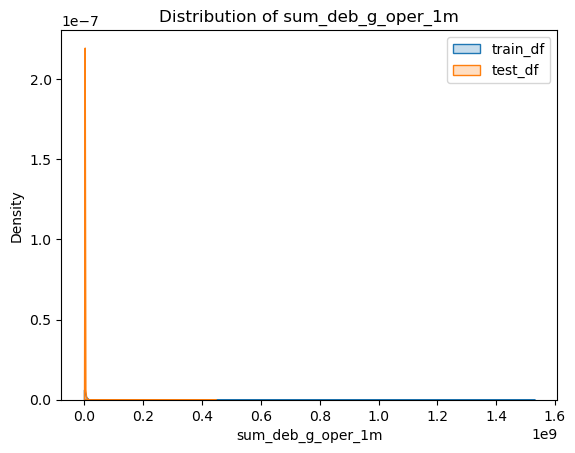

C:\Users\Юлия\AppData\Local\Temp\ipykernel_9252\3920947444.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(train_df[col], label='train_df', shade=True)
C:\Users\Юлия\AppData\Local\Temp\ipykernel_9252\3920947444.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(test_df[col], label='test_df', shade=True)


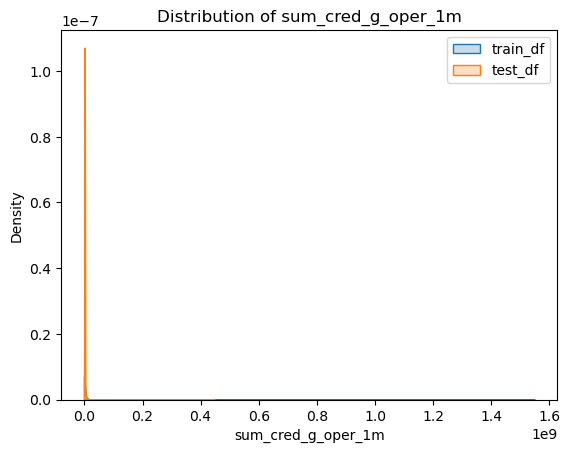

C:\Users\Юлия\AppData\Local\Temp\ipykernel_9252\3920947444.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(train_df[col], label='train_df', shade=True)
C:\Users\Юлия\AppData\Local\Temp\ipykernel_9252\3920947444.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(test_df[col], label='test_df', shade=True)


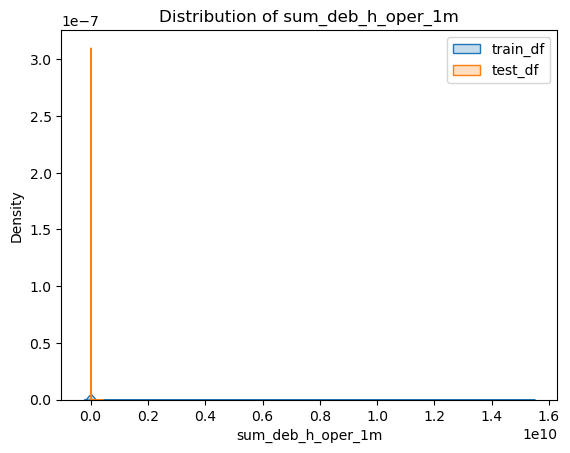

C:\Users\Юлия\AppData\Local\Temp\ipykernel_9252\3920947444.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(train_df[col], label='train_df', shade=True)
C:\Users\Юлия\AppData\Local\Temp\ipykernel_9252\3920947444.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(test_df[col], label='test_df', shade=True)


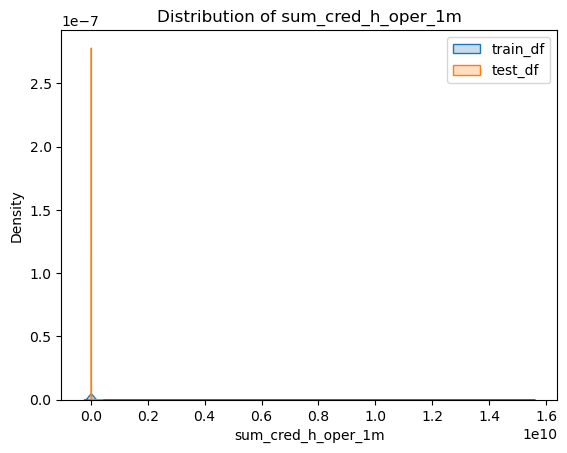

C:\Users\Юлия\AppData\Local\Temp\ipykernel_9252\3920947444.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(train_df[col], label='train_df', shade=True)
C:\Users\Юлия\AppData\Local\Temp\ipykernel_9252\3920947444.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(test_df[col], label='test_df', shade=True)


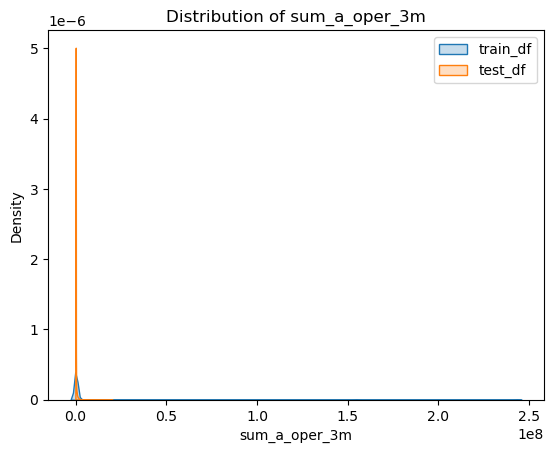

C:\Users\Юлия\AppData\Local\Temp\ipykernel_9252\3920947444.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(train_df[col], label='train_df', shade=True)
C:\Users\Юлия\AppData\Local\Temp\ipykernel_9252\3920947444.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(test_df[col], label='test_df', shade=True)


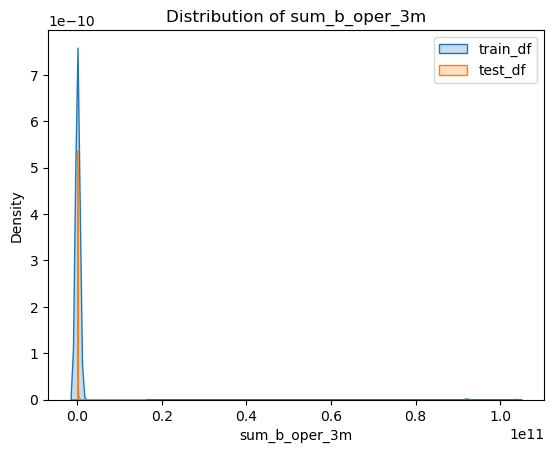

C:\Users\Юлия\AppData\Local\Temp\ipykernel_9252\3920947444.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(train_df[col], label='train_df', shade=True)
C:\Users\Юлия\AppData\Local\Temp\ipykernel_9252\3920947444.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(test_df[col], label='test_df', shade=True)


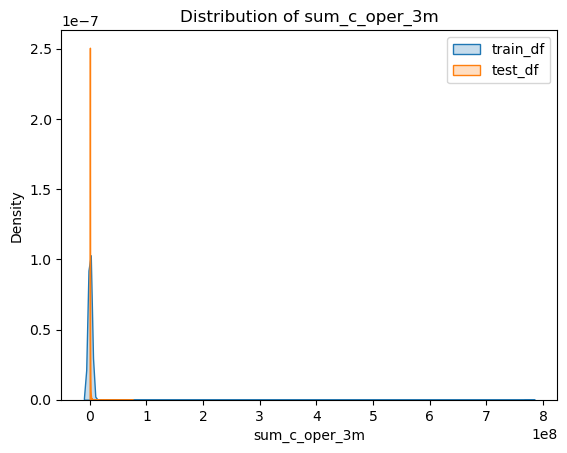

C:\Users\Юлия\AppData\Local\Temp\ipykernel_9252\3920947444.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(train_df[col], label='train_df', shade=True)
C:\Users\Юлия\AppData\Local\Temp\ipykernel_9252\3920947444.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(test_df[col], label='test_df', shade=True)


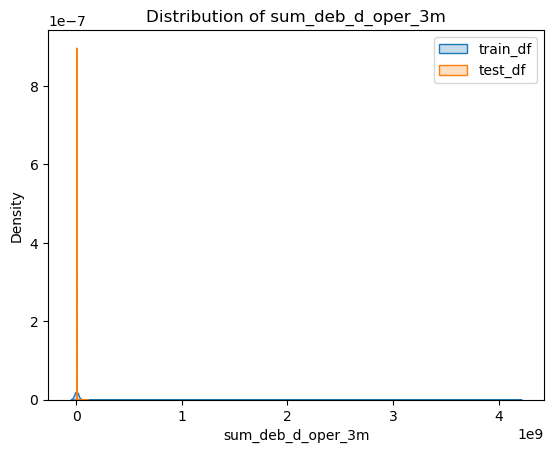

C:\Users\Юлия\AppData\Local\Temp\ipykernel_9252\3920947444.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(train_df[col], label='train_df', shade=True)
C:\Users\Юлия\AppData\Local\Temp\ipykernel_9252\3920947444.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(test_df[col], label='test_df', shade=True)


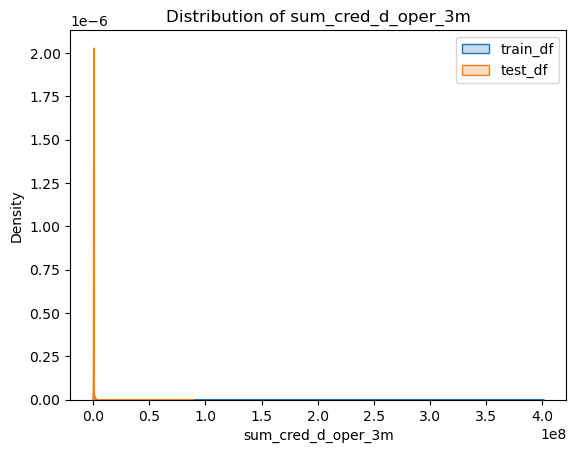

C:\Users\Юлия\AppData\Local\Temp\ipykernel_9252\3920947444.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(train_df[col], label='train_df', shade=True)
C:\Users\Юлия\AppData\Local\Temp\ipykernel_9252\3920947444.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(test_df[col], label='test_df', shade=True)


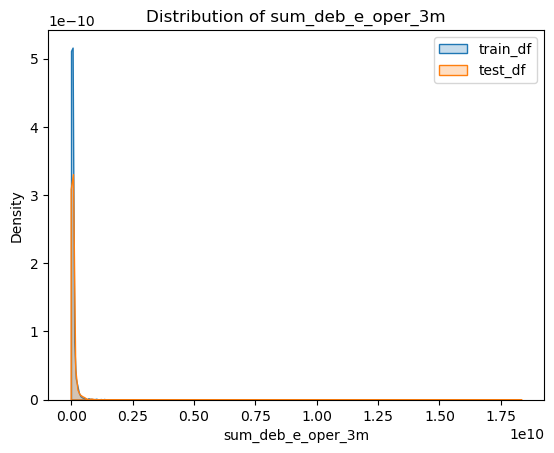

C:\Users\Юлия\AppData\Local\Temp\ipykernel_9252\3920947444.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(train_df[col], label='train_df', shade=True)
C:\Users\Юлия\AppData\Local\Temp\ipykernel_9252\3920947444.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(test_df[col], label='test_df', shade=True)


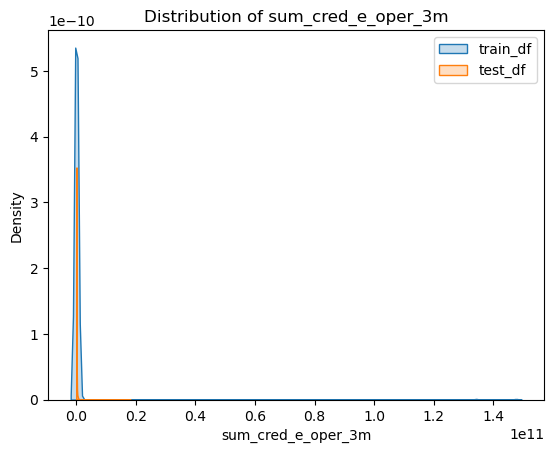

C:\Users\Юлия\AppData\Local\Temp\ipykernel_9252\3920947444.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(train_df[col], label='train_df', shade=True)
C:\Users\Юлия\AppData\Local\Temp\ipykernel_9252\3920947444.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(test_df[col], label='test_df', shade=True)


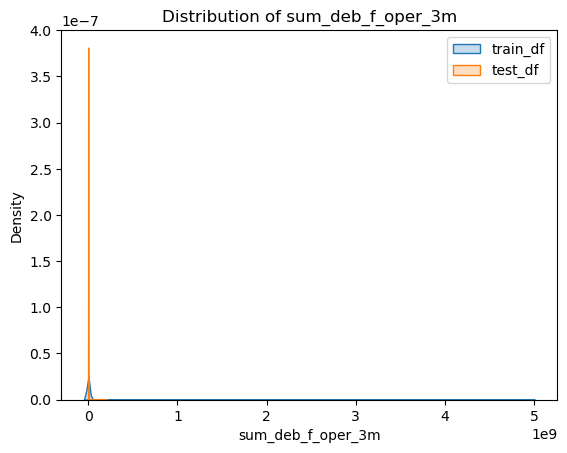

C:\Users\Юлия\AppData\Local\Temp\ipykernel_9252\3920947444.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(train_df[col], label='train_df', shade=True)
C:\Users\Юлия\AppData\Local\Temp\ipykernel_9252\3920947444.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(test_df[col], label='test_df', shade=True)


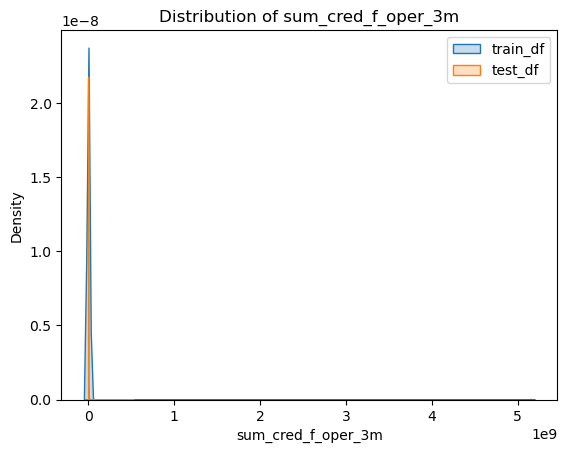

C:\Users\Юлия\AppData\Local\Temp\ipykernel_9252\3920947444.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(train_df[col], label='train_df', shade=True)
C:\Users\Юлия\AppData\Local\Temp\ipykernel_9252\3920947444.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(test_df[col], label='test_df', shade=True)


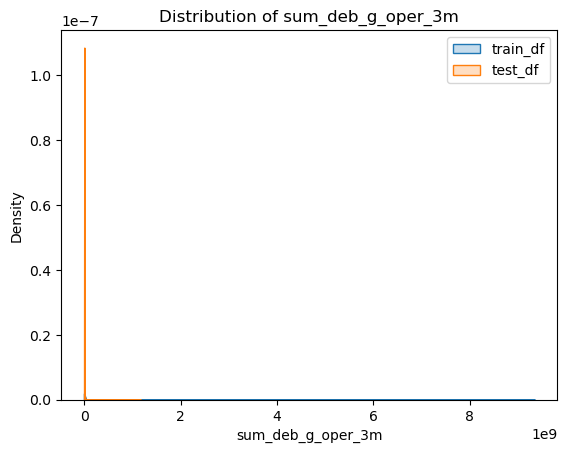

C:\Users\Юлия\AppData\Local\Temp\ipykernel_9252\3920947444.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(train_df[col], label='train_df', shade=True)
C:\Users\Юлия\AppData\Local\Temp\ipykernel_9252\3920947444.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(test_df[col], label='test_df', shade=True)


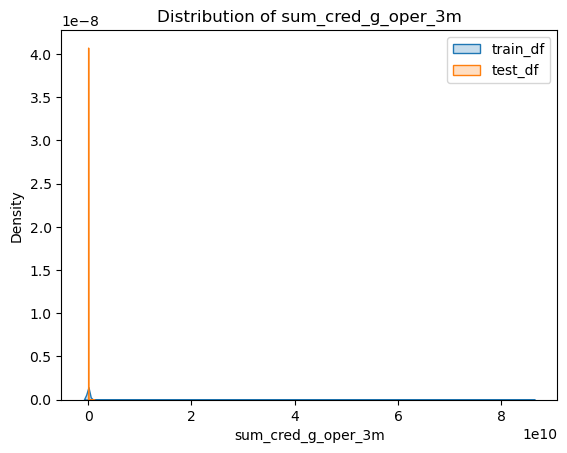

C:\Users\Юлия\AppData\Local\Temp\ipykernel_9252\3920947444.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(train_df[col], label='train_df', shade=True)
C:\Users\Юлия\AppData\Local\Temp\ipykernel_9252\3920947444.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(test_df[col], label='test_df', shade=True)


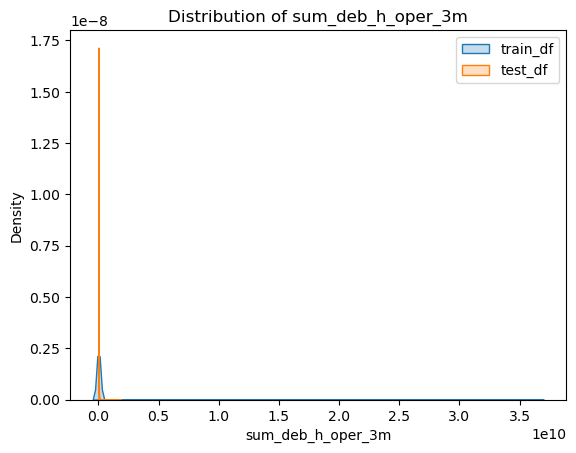

C:\Users\Юлия\AppData\Local\Temp\ipykernel_9252\3920947444.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(train_df[col], label='train_df', shade=True)
C:\Users\Юлия\AppData\Local\Temp\ipykernel_9252\3920947444.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(test_df[col], label='test_df', shade=True)


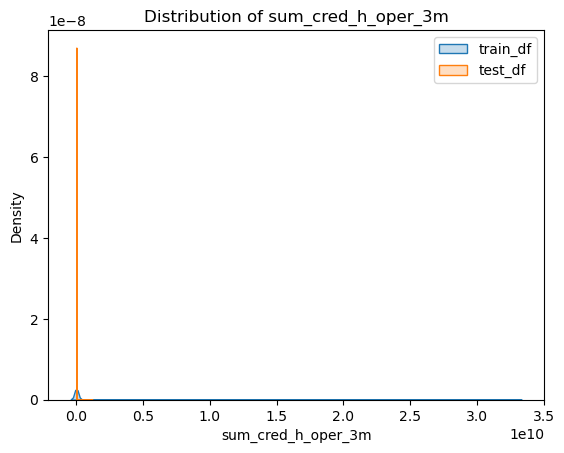

In [30]:
for col in differences:
    plt.figure()
    sb.kdeplot(train_df[col], label='train_df', shade=True)
    sb.kdeplot(test_df[col], label='test_df', shade=True)
    plt.title(f'Distribution of {col}')
    plt.legend()
    plt.show()